## Dataset Overview

**Dataset:** Life Expectancy (WHO) Dataset  

**URL:** https://www.kaggle.com/datasets/augustus0498/life-expectancy-who/data  

**Description:** The dataset contains information from the World Health Organization's Global Health Observatory (GHO) and the United Nations website. It covers 193 countries and includes data on life expectancy, various health factors, and economic indicators such as GDP and poverty rates. This dataset is valuable for research in public health, healthcare policy-making, and socio-economic studies. It helps understand the relationship between health outcomes, socio-economic factors, and policy interventions globally.  

**Columns:**  

Country - Country

Year - Year

Status - Developed or Developing status

Lifeexpectancy - Life Expectancy in age

AdultMortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infantdeaths - Number of Infant Deaths per 1000 population

Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentageexpenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

HepatitisB - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles - Measles - number of reported cases per 1000 population

BMI - Average Body Mass Index of entire population

under-fivedeaths - Number of under-five deaths per 1000 population

Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

Totalexpenditure - General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP - Gross Domestic Product per capita (in USD)

Population - Population of the country

thinness1-19years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

thinness5-9years - Prevalence of thinness among children for Age 5 to 9(%)

Incomecompositionofresources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling - Number of years of Schooling(years)



In [346]:
#import required libraries
library(ggplot2)
library(tidyverse)
library(dplyr)
library(corrplot)

health_data <-read.csv('/Users/saaijeeshsn/Downloads/led.csv')
head(health_data)


Country     Year Status     Lifeexpectancy AdultMortality infantdeaths
1 Afghanistan 2015 Developing 65.0           263            62          
2 Afghanistan 2014 Developing 59.9           271            64          
3 Afghanistan 2013 Developing 59.9           268            66          
4 Afghanistan 2012 Developing 59.5           272            69          
5 Afghanistan 2011 Developing 59.2           275            71          
6 Afghanistan 2010 Developing 58.8           279            74          
  Alcohol percentageexpenditure HepatitisB Measles ... Polio Totalexpenditure
1 0.01    71.279624             65         1154    ...  6    8.16            
2 0.01    73.523582             62          492    ... 58    8.18            
3 0.01    73.219243             64          430    ... 62    8.13            
4 0.01    78.184215             67         2787    ... 67    8.52            
5 0.01     7.097109             68         3013    ... 68    7.87            
6 0.01    79.679367             66         1989    ... 66    9.20            
  Diphtheria HIV.AIDS GDP       Population thinness1.19years thinness5.9years
1 65         0.1      584.25921 33736494   17.2              17.3            
2 62         0.1      612.69651   327582   17.5              17.5            
3 64         0.1      631.74498 31731688   17.7              17.7            
4 67         0.1      669.95900  3696958   17.9              18.0            
5 68         0.1       63.53723  2978599   18.2              18.2            
6 66         0.1      553.32894  2883167   18.4              18.4            
  Incomecompositionofresources Schooling
1 0.479                        10.1     
2 0.476                        10.0     
3 0.470                         9.9     
4 0.463                         9.8     
5 0.454                         9.5     
6 0.448                         9.2

In [347]:
#display the column names
colnames(health_data)

[1] "Country"                      "Year"                        
 [3] "Status"                       "Lifeexpectancy"              
 [5] "AdultMortality"               "infantdeaths"                
 [7] "Alcohol"                      "percentageexpenditure"       
 [9] "HepatitisB"                   "Measles"                     
[11] "BMI"                          "under.fivedeaths"            
[13] "Polio"                        "Totalexpenditure"            
[15] "Diphtheria"                   "HIV.AIDS"                    
[17] "GDP"                          "Population"                  
[19] "thinness1.19years"            "thinness5.9years"            
[21] "Incomecompositionofresources" "Schooling"

In [348]:
#count the number of rows
nrow(health_data)

[1] 2938

## Data Preprocessing

### 1. Check for null values

In [349]:
#checking null values
num_na_values <- colSums(is.na(health_data))
num_na_values

Country                         Year 
                           0                            0 
                      Status               Lifeexpectancy 
                           0                           10 
              AdultMortality                 infantdeaths 
                          10                            0 
                     Alcohol        percentageexpenditure 
                         194                            0 
                  HepatitisB                      Measles 
                         553                            0 
                         BMI             under.fivedeaths 
                          34                            0 
                       Polio             Totalexpenditure 
                          19                          226 
                  Diphtheria                     HIV.AIDS 
                          19                            0 
                         GDP                   Population 
                         448                          652 
           thinness1.19years             thinness5.9years 
                          34                           34 
Incomecompositionofresources                    Schooling 
                         167                          163

In [350]:
#drop null values
health_data<- health_data[complete.cases(health_data), ]
nrow(health_data)

[1] 1649

I have dropped missing values that have nulls in the dataset.

### 2. Check for duplicates values

In [351]:
#check for duplicate rows
duplicate_rows <- health_data[duplicated(health_data), ]

#count the duplicate rows
nrow(duplicate_rows)

[1] 0

There are no duplicate values in the dataset.

### 3. Check for datatypes

In [352]:
#check datatypes
str(health_data)

'data.frame':	1649 obs. of  22 variables:
 $ Country                     : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                        : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                      : chr  "Developing" "Developing" "Developing" "Developing" ...
 $ Lifeexpectancy              : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ AdultMortality              : int  263 271 268 272 275 279 281 287 295 295 ...
 $ infantdeaths                : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                     : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentageexpenditure       : num  71.3 73.5 73.2 78.2 7.1 ...
 $ HepatitisB                  : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                     : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                         : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7 15.2 14.7 ...
 $ under.fivedeath

I observe both numerical and a couple of categorical columns in the dataset.

### 4. Split the data into train and test

In [353]:
#training and test set
set.seed(11111)
n = floor(0.8 * nrow(health_data)) 
index = sample(seq_len(nrow(health_data)), size = n) #randomly sample indicies to be included in the training set

train = health_data[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = health_data[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set.\n")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  #check the dimensions

There are 1319 rows and 22 columns in the training set.
There are 330 rows and 22 columns in the testing set.

In [354]:
#train data
head(train)

Country    Year Status     Lifeexpectancy AdultMortality infantdeaths
131  Austria    2013 Developed  81.1            68             0          
134  Austria    2010 Developed  84.0            75             0          
678  Cyprus     2011 Developed  79.7            57             0          
147  Azerbaijan 2013 Developing 72.2           121             5          
2061 Portugal   2010 Developed  79.6            88             0          
2564 Tajikistan 2005 Developing 65.5           194            10          
     Alcohol percentageexpenditure HepatitisB Measles ... Polio
131  11.82     90.58501            95           0     ... 95   
134  12.10   7423.22877            86          52     ... 86   
678  10.69   2443.32503            96           0     ... 99   
147   2.14    275.65149            93         164     ... 96   
2061 12.25   3119.34982            97           5     ... 97   
2564  0.37     19.83672            81           0     ... 79   
     Totalexpenditure Diphtheria HIV.AIDS GDP        Population
131  11.14            95         0.1        554.7153 8479375   
134  11.17            86         0.1      46657.6290  836344   
678   7.54            99         0.1      32233.8394 1124835   
147   5.54            93         0.1       7875.7570  941681   
2061  1.44            98         0.1      22538.6548   15731   
2564  5.89            84         0.3        337.3592 6854176   
     thinness1.19years thinness5.9years Incomecompositionofresources Schooling
131  1.8               2.0              0.887                        15.7     
134  1.7               1.9              0.872                        15.4     
678  0.9               1.0              0.847                        13.8     
147  2.8               2.8              0.745                        11.9     
2061 0.7               0.5              0.812                        16.0     
2564 3.8               3.9              0.572                        10.6

In [355]:
#test data
head(test)

Country     Year Status     Lifeexpectancy AdultMortality infantdeaths
1  Afghanistan 2015 Developing 65.0           263            62          
5  Afghanistan 2011 Developing 59.2           275            71          
10 Afghanistan 2006 Developing 57.3           295            84          
11 Afghanistan 2005 Developing 57.3           291            85          
13 Afghanistan 2003 Developing 56.7           295            87          
29 Albania     2003 Developing 72.8            18             1          
   Alcohol percentageexpenditure HepatitisB Measles ... Polio Totalexpenditure
1  0.01    71.279624             65         1154    ...  6    8.16            
5  0.01     7.097109             68         3013    ... 68    7.87            
10 0.03    17.171518             64         1990    ... 58    7.43            
11 0.02     1.388648             66         1296    ... 58    8.70            
13 0.01    11.089053             65          798    ... 41    8.82            
29 4.29    14.719289             97            8    ... 97    6.27            
   Diphtheria HIV.AIDS GDP       Population thinness1.19years thinness5.9years
1  65         0.1      584.25921 33736494   17.2              17.3            
5  68         0.1       63.53723  2978599   18.2              18.2            
10 58         0.1      272.56377  2589345   19.2              19.3            
11 58         0.1       25.29413   257798   19.3              19.5            
13 41         0.1      198.72854  2364851   19.7              19.9            
29 97         0.1      189.68156   339616    1.9               2.0            
   Incomecompositionofresources Schooling
1  0.479                        10.1     
5  0.454                         9.5     
10 0.405                         8.1     
11 0.396                         7.9     
13 0.373                         6.5     
29 0.674                        10.7

I split the data into two sets: 80% for training and 20% for testing.

## Exploratory Data Analysis

### 1. Correlation plot

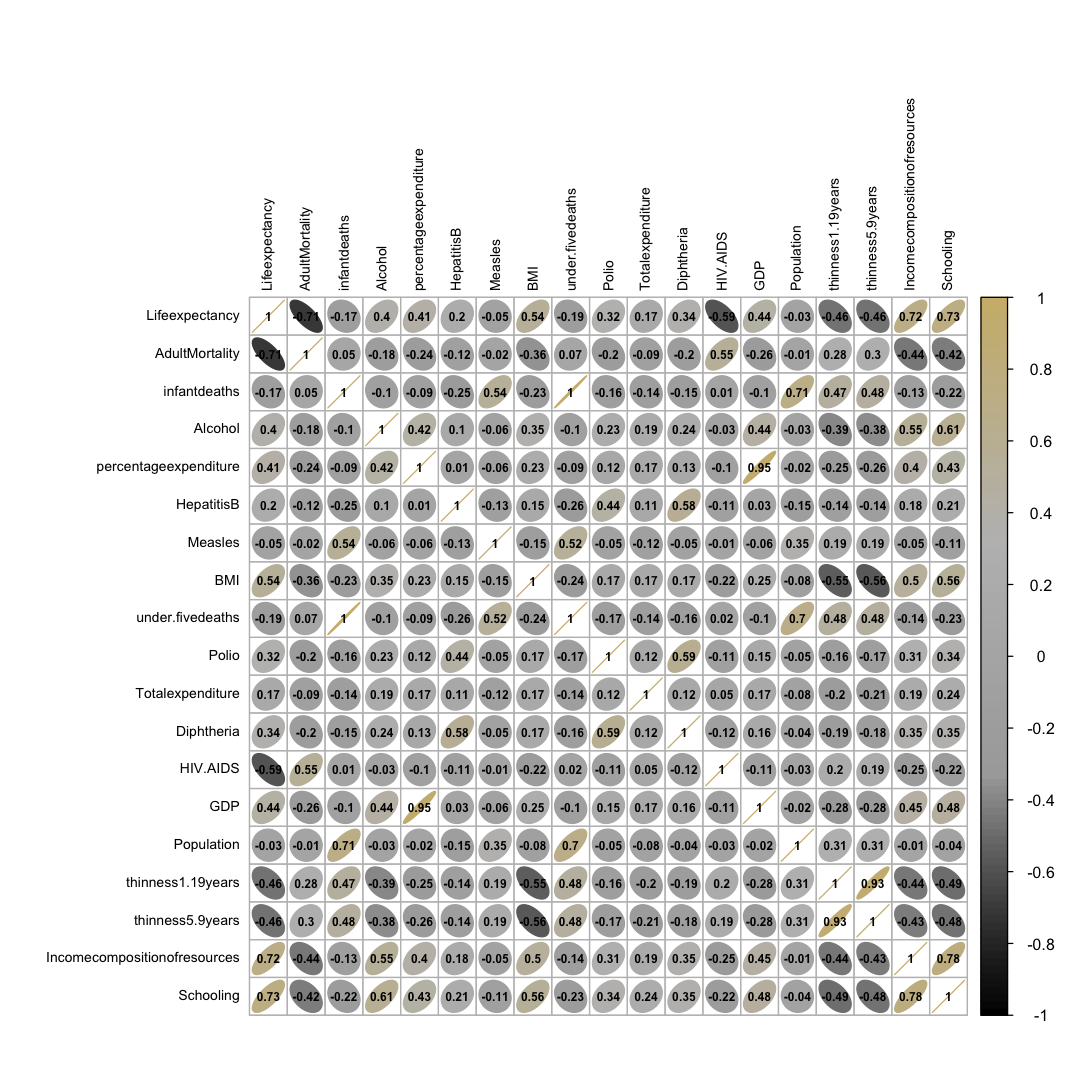

In [356]:
col4 <- colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))

#exclude the first columns
corr_matrix <- cor(train[, -c(1:3)])

#correlation plot
corrplot(corr_matrix, method = "ellipse", col = col4(100), addCoef.col = "black", tl.col = "black",
          tl.cex = 0.7,number.cex = 0.6)  


We can observe a strong positive correlation between schooling and income composition of resources with life expectancy. Conversely, there is a negative correlation between adult mortality and HIV/AIDS with life expectancy.

### 2. Distribution of Life expectancy

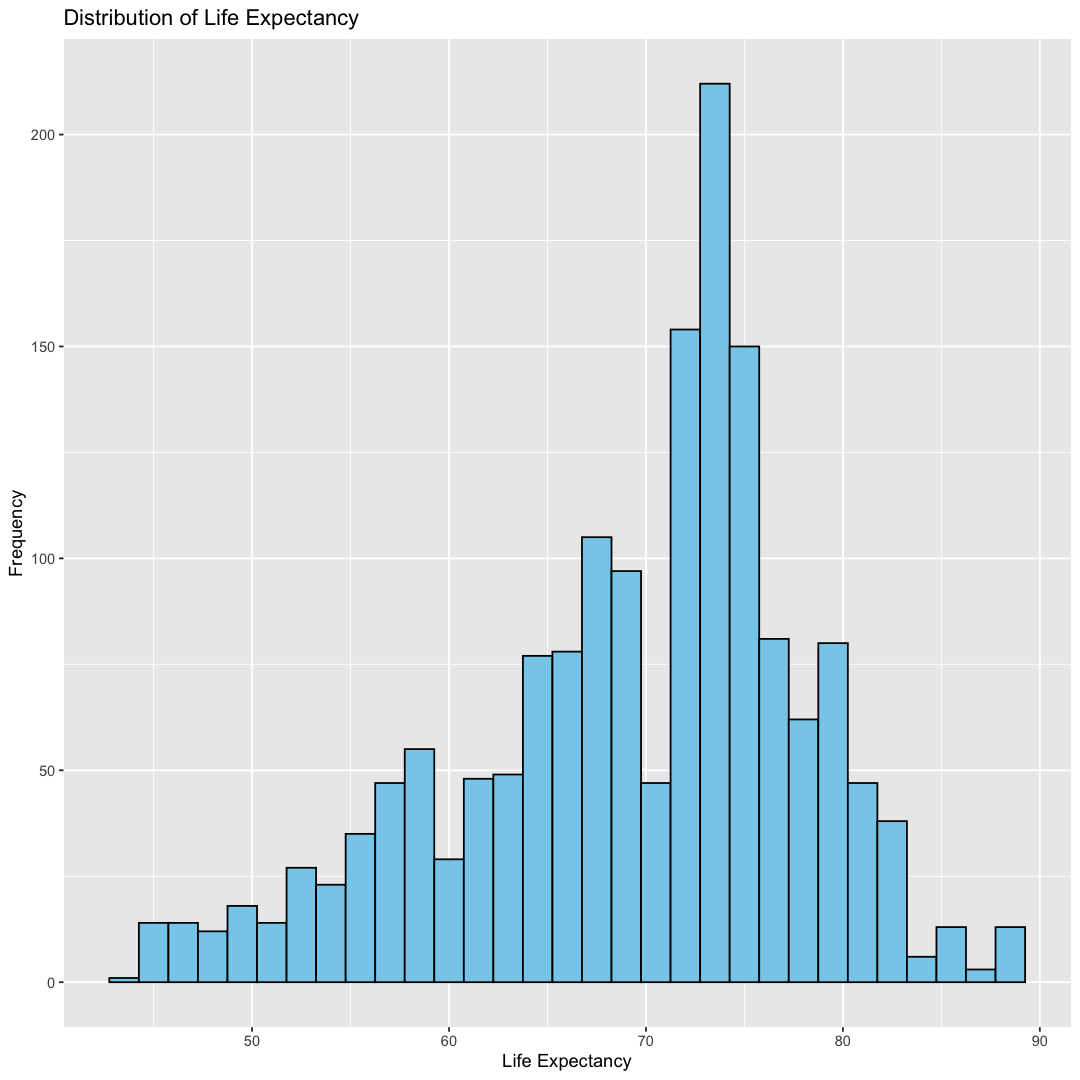

In [357]:
#plot histogram for life expectancy
ggplot(data = health_data, aes(x = Lifeexpectancy)) +
  geom_histogram(binwidth = 1.5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Life Expectancy", x = "Life Expectancy", y = "Frequency") 

We can observe that the distribution of life expectancy is skewed to the left.

### 3. Comparison of Percentage Expenditure by Life Expectancy Category

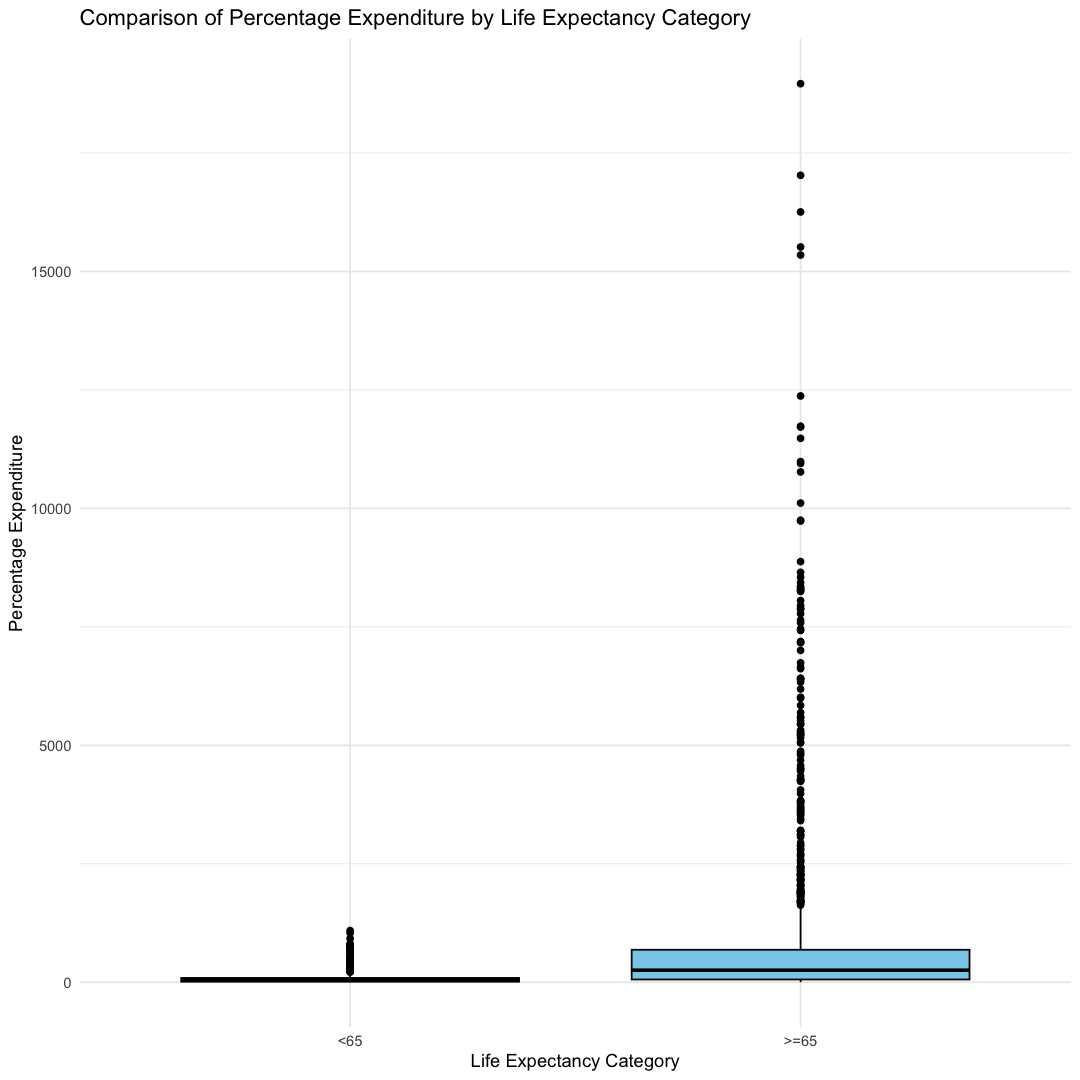

In [358]:
#categorizing the life expectancy category
health_data$life_expectancy_category <- ifelse(health_data$Lifeexpectancy < 65, "<65", ">=65")

#create a box plot
ggplot(data = health_data, aes(x = life_expectancy_category, y = percentageexpenditure)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Comparison of Percentage Expenditure by Life Expectancy Category",x = "Life Expectancy Category", y = "Percentage Expenditure") +
  theme_minimal()

We can observe that individuals who spend more on healthcare tend to have longer life expectancies, as shown by the presence of more outliers in the box plot.

### 4. Relationship between Life Expectancy and Alcohol Consumption

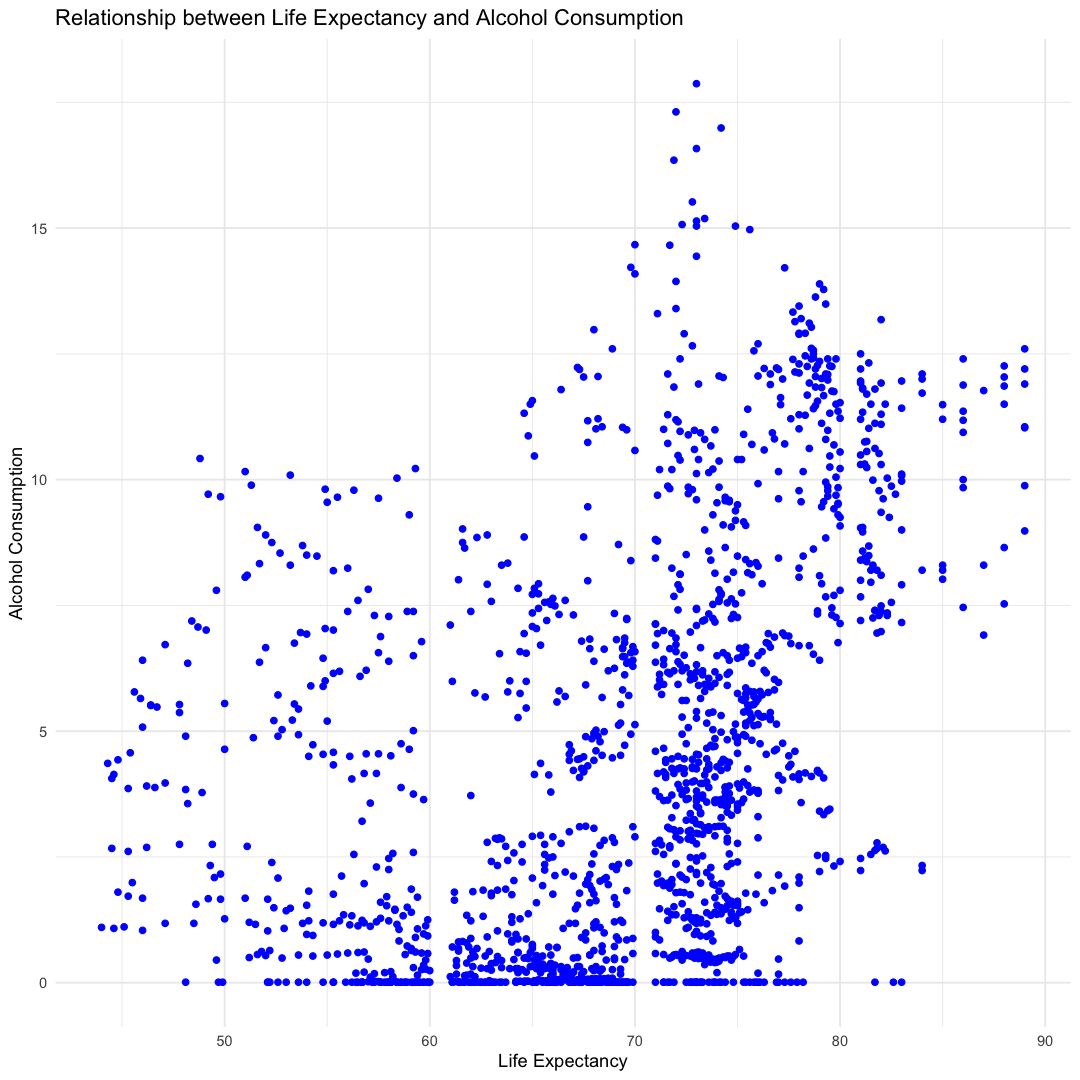

In [359]:
#scatter plot between life expectancy and alcohol consumption
ggplot(data = health_data, aes(x = Lifeexpectancy, y = Alcohol)) +
  geom_point(color = "blue") +
  labs(title = "Relationship between Life Expectancy and Alcohol Consumption",x = "Life Expectancy", y = "Alcohol Consumption") +
  theme_minimal()

We observe a slight increase in life expectancy with higher levels of alcohol consumption; however, we cannot conclusively state that individuals tend to live longer as alcohol consumption increases.

### 5. Comparison of Life Expectancy Distributions by Schooling Category

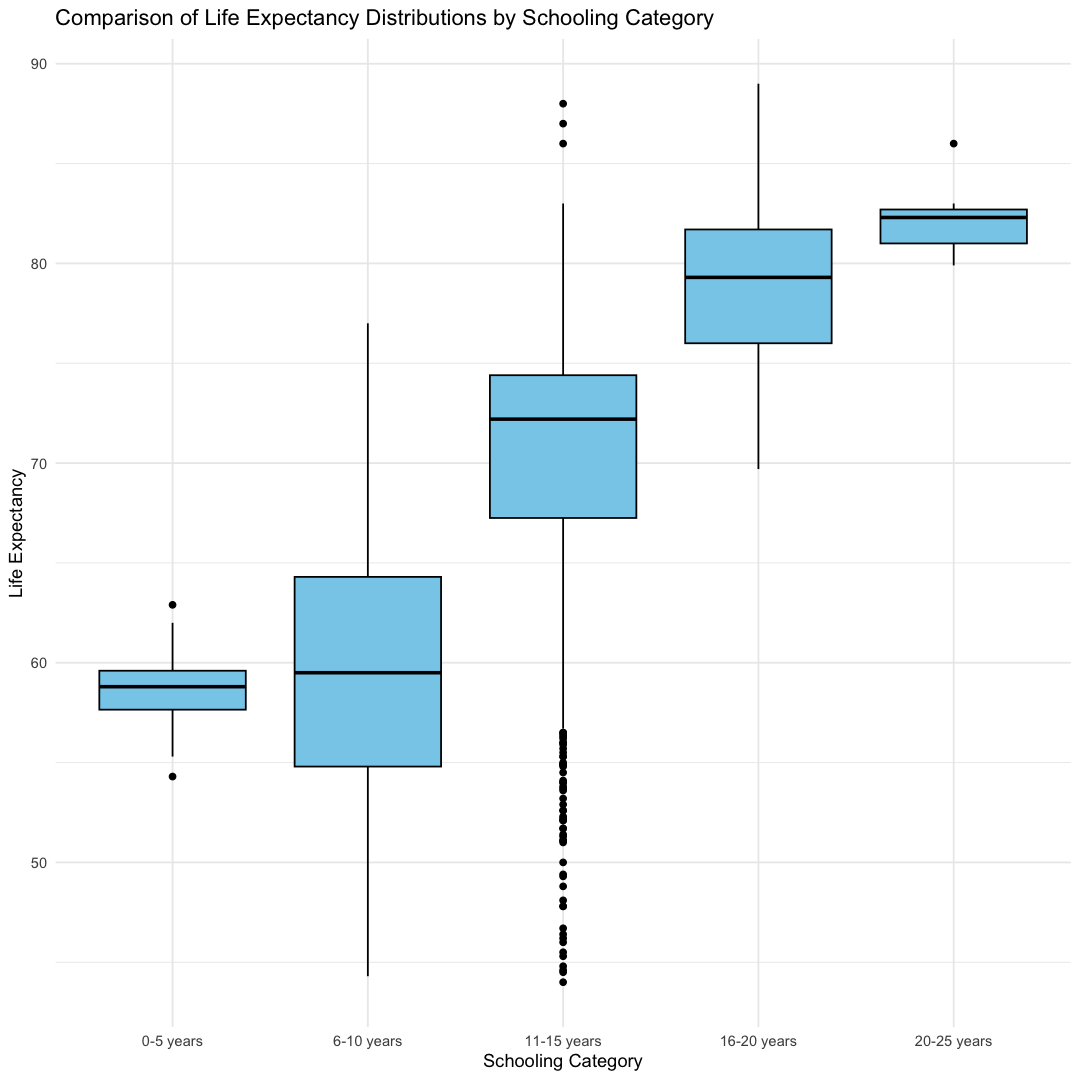

In [360]:
#categorizing the schooling column
health_data$Schooling_Category <- cut(health_data$Schooling, breaks = c(0, 5, 10, 15, 20, 25),
                                    labels = c("0-5 years", "6-10 years", "11-15 years", "16-20 years", "20-25 years"),include.lowest = TRUE)

#create a box plot
ggplot(data = health_data, aes(x = Schooling_Category, y = Lifeexpectancy)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Comparison of Life Expectancy Distributions by Schooling Category", x = "Schooling Category", y = "Life Expectancy") +
  theme_minimal()

We can observe that the mean life expectancy increases as the number of years of education increases. Overall, we can see that if an individual has 10 or more years of education, they tend to live longer. This might be because they have more knowledge about which dietary habits to follow and what needs to be considered to increase life expectancy.

## Statistical modelling techniques

### 1. Bootstraping and Confidence Interval

The purpose of this analysis is to assess whether the median life expectancy of the entire population, including both developing and developed countries, aligns with the confidence interval obtained from bootstrapping specifically for developing countries. This comparison helps us understand how well the overall median fits within the range of life expectancies observed in developing countries, thereby aiding our understanding of differences in health and well-being around the world.

In [361]:
#filter out the developing countries
filtered_data <- health_data %>%
  filter(Status == 'Developing')

#compute median life expectancy of all country from the original datatset
median_filtered_data<-median(health_data$Lifeexpectancy)
cat("Median life expectancy of all country is:",median_filtered_data)

Median life expectancy of all country is: 71.7

In [362]:
#number of samples
num_of_samples <- 5000

#compute the life_exp for each sample
life_exp <- replicate(num_of_samples, median(sample(filtered_data$Lifeexpectancy, size = length(filtered_data$Lifeexpectancy), replace = TRUE)))

#print life expectancy for each sample
print("Median Life expectancy for each sample:")
print(life_exp)

[1] "Median Life expectancy for each sample:"
   [1] 69.0 69.1 69.4 69.1 69.0 69.2 69.3 69.0 69.1 68.8 69.5 69.1 69.3 68.6
  [15] 69.6 69.4 69.0 69.2 69.5 69.4 69.4 69.0 69.5 69.2 69.5 69.4 69.9 68.6
  [29] 69.0 69.2 69.2 69.0 68.9 69.0 69.0 69.3 69.4 68.9 69.3 69.3 69.4 69.3
  [43] 69.1 68.9 68.9 69.0 70.0 69.3 69.3 69.4 69.9 68.7 69.3 69.9 69.3 69.2
  [57] 68.8 68.9 69.1 69.2 69.1 69.0 69.2 69.4 69.3 68.8 69.0 69.3 69.4 69.5
  [71] 68.7 69.3 69.0 68.5 69.6 69.5 69.3 69.5 68.7 69.4 69.2 68.7 69.4 69.3
  [85] 69.5 69.4 69.1 69.0 69.2 69.2 69.4 68.9 69.1 69.3 69.2 69.1 69.3 68.8
  [99] 69.2 69.0 69.5 69.2 68.4 69.4 69.8 69.2 69.3 69.4 69.4 69.2 69.6 69.3
 [113] 69.0 69.3 69.1 69.5 69.6 69.0 68.9 69.8 69.2 69.0 69.1 69.3 69.1 69.6
 [127] 69.3 69.4 69.1 69.3 69.1 69.0 69.0 69.0 68.7 69.0 69.0 69.4 69.0 69.0
 [141] 69.3 69.6 69.1 69.3 69.4 69.1 69.0 69.0 68.8 68.7 68.7 68.5 68.9 69.5
 [155] 69.0 68.9 69.2 69.3 69.5 69.0 69.3 69.5 69.2 69.0 68.7 69.3 69.2 69.5
 [169] 69.3 69.4 69.8 69.1 69.

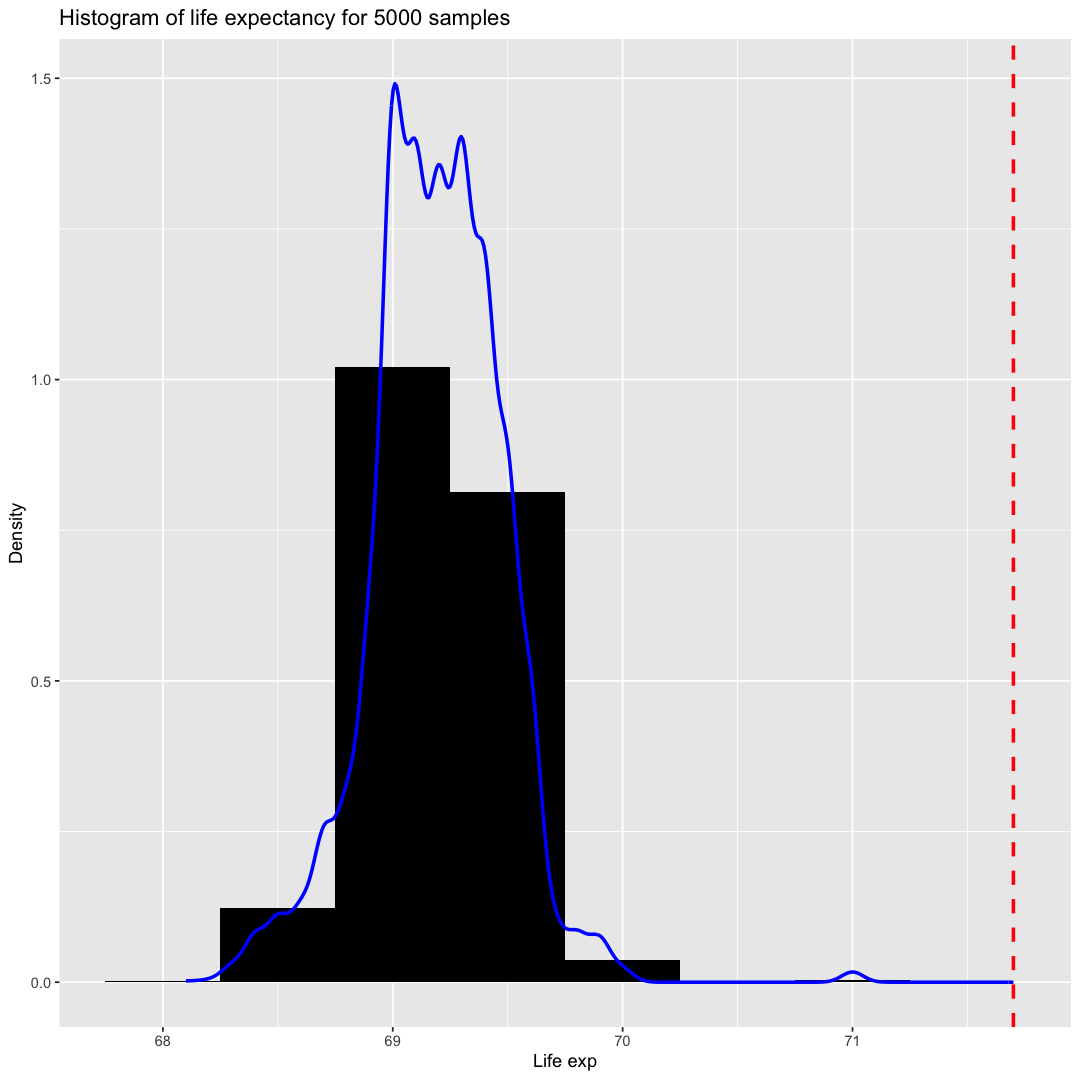

In [363]:
life_exp_value <- data.frame(exp = life_exp)

#create a histogram using ggplot2
ggplot(life_exp_value, aes(x = exp,y = after_stat(density))) +
geom_histogram(binwidth = 0.5,fill="black")+
geom_density(color="blue",size=1)+
geom_vline(xintercept = median(health_data$Lifeexpectancy), linetype = "dashed", color = "red", size = 1)+
labs(title = "Histogram of life expectancy for 5000 samples", x = "Life exp", y = "Density")

In [364]:
#for 95% Confidence interval
#compute lower and upper limits
lower_limit <- quantile(life_exp, 0.025)
upper_limit <- quantile(life_exp, 0.975)

#print the results
cat("Lower Limit:", lower_limit, "\n")
cat("Upper Limit:", upper_limit)


Lower Limit: 68.6 
Upper Limit: 69.7

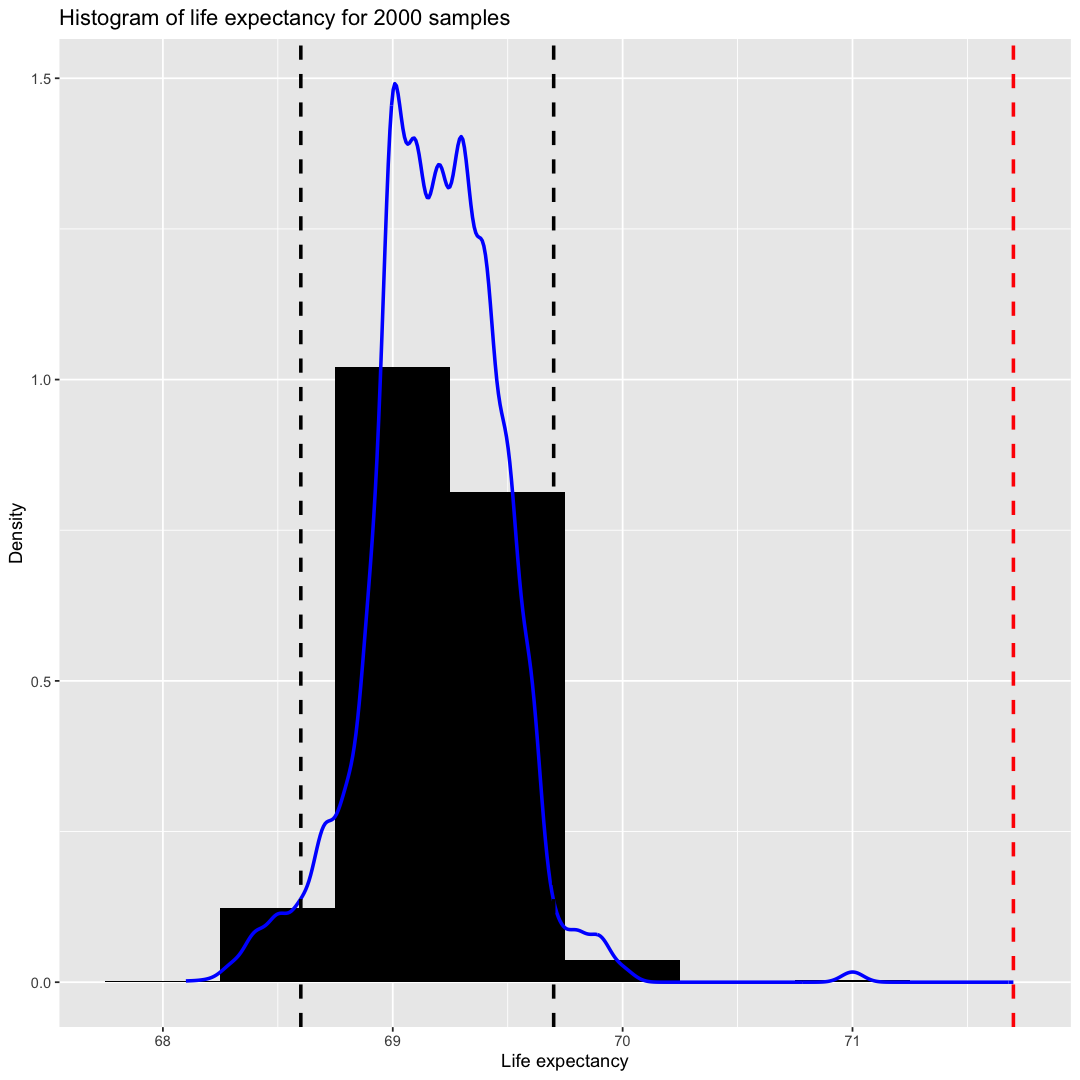

In [365]:
#create a histogram, density plot
ggplot(life_exp_value,aes(x=exp,y=after_stat(density)))+
geom_histogram(binwidth=0.5,fill="black")+
geom_density(color="blue",size=1)+
geom_vline(xintercept = lower_limit, linetype = "dashed", color = "black", size = 1)+
geom_vline(xintercept = upper_limit, linetype = "dashed", color = "black", size = 1)+
geom_vline(xintercept = median(health_data$Lifeexpectancy), linetype = "dashed", color = "red", size = 1)+
labs(title = "Histogram of life expectancy for 2000 samples", x = "Life expectancy", y = "Density")

In [366]:
#compute nps value from original dataset
original_dataset<-median(health_data$Lifeexpectancy)
cat("Median life expectancy of Developing countries:",original_dataset,'\n')  

#compute the difference
diff_org_lower<-original_dataset-lower_limit
cat("Median life expectancy of the difference between the original dataset and the lower limit:",diff_org_lower,'\n')  
diff_org_upper<-original_dataset - upper_limit 
cat("Median life expectancy of the difference between the original dataset and the upper limit:",diff_org_upper)  

Median life expectancy of Developing countries: 71.7 
Median life expectancy of the difference between the original dataset and the lower limit: 3.1 
Median life expectancy of the difference between the original dataset and the upper limit: 2

**Findings:**  

The median life expectancy of all countries falls outside the confidence interval of the bootstrapped developing countries. This highlights the differences in health outcomes between developed and developing areas, stressing the need for specific actions to tackle these gaps and ensure fairness in global healthcare access.

### 2. Hypothesis testing

#### **Analysis 1:**  
##### **Comparison of Life Expectancy: India vs. Other Countries**  

**Null hypothesis:** There is no difference in the mean life expectancy between India and other countries.  

**Alternate hypothesis:** The mean life expectancy in India is different from that of other countries.

In [367]:
# Extract life expectancy for India
life_expectancy_india <- health_data$Lifeexpectancy[health_data$Country == 'India']

# Extract life expectancy for all other countries
life_expectancy_others <- health_data$Lifeexpectancy[health_data$Country != 'India']

# Perform t-test
t_test_result <- t.test(life_expectancy_india, life_expectancy_others)

# Print the result
t_test_result



	Welch Two Sample t-test

data:  life_expectancy_india and life_expectancy_others
t = -7.2443, df = 16.666, p-value = 1.542e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.294180 -2.354782
sample estimates:
mean of x mean of y 
 66.00000  69.32448 


**Findings:**

I observed that the p-value is less than 0.05 (i.e., a 95% confidence interval), indicating there is no significant difference in life expectancy between India and other countries. Therefore, we reject the null hypothesis.

#### **Analysis 2:**  
##### **Impact of BMI on Life expectancy**  

**Null hypothesis:** There is no association between BMI and Life expectancy.  

**Alternate hypothesis:** BMI affects life expectancy.  


In [368]:
#fit linear regression model
lm_model <- lm(Lifeexpectancy ~ BMI, data = health_data)

#summarize the results
summary(lm_model)


Call:
lm(formula = Lifeexpectancy ~ BMI, data = health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3402  -4.5126   0.6598   4.7391  27.2356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 60.098877   0.395945  151.79   <2e-16 ***
BMI          0.241378   0.009221   26.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.395 on 1647 degrees of freedom
Multiple R-squared:  0.2938,	Adjusted R-squared:  0.2934 
F-statistic: 685.2 on 1 and 1647 DF,  p-value: < 2.2e-16


**Findings:**  
  
I observed that the p-value is less than 0.05 (i.e., a 95% confidence interval), indicating there is association between BMI and life expectancy. Therefore, we reject the null hypothesis.

### 3. MLR model and its Diagnostics – goodness of fit, feature selection, residuals

In [370]:
#fit the model with train data
lm_health = lm(Lifeexpectancy ~ AdultMortality + infantdeaths + Alcohol + percentageexpenditure + HepatitisB + Measles + BMI + under.fivedeaths + Polio + Totalexpenditure + Diphtheria + HIV.AIDS + GDP + Population + thinness1.19years + thinness5.9years + Incomecompositionofresources + Schooling, data = train)
summary(lm_health)



Call:
lm(formula = Lifeexpectancy ~ AdultMortality + infantdeaths + 
    Alcohol + percentageexpenditure + HepatitisB + Measles + 
    BMI + under.fivedeaths + Polio + Totalexpenditure + Diphtheria + 
    HIV.AIDS + GDP + Population + thinness1.19years + thinness5.9years + 
    Incomecompositionofresources + Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1195  -2.0364  -0.0759   2.2355  12.0019 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.333e+01  8.257e-01  64.588  < 2e-16 ***
AdultMortality               -1.727e-02  1.063e-03 -16.239  < 2e-16 ***
infantdeaths                  9.132e-02  1.180e-02   7.738 2.01e-14 ***
Alcohol                      -5.456e-02  3.378e-02  -1.615   0.1065    
percentageexpenditure         3.949e-04  1.963e-04   2.011   0.0445 *  
HepatitisB                   -5.485e-03  4.924e-03  -1.114   0.2655    
Measles                      -6.681e-06  

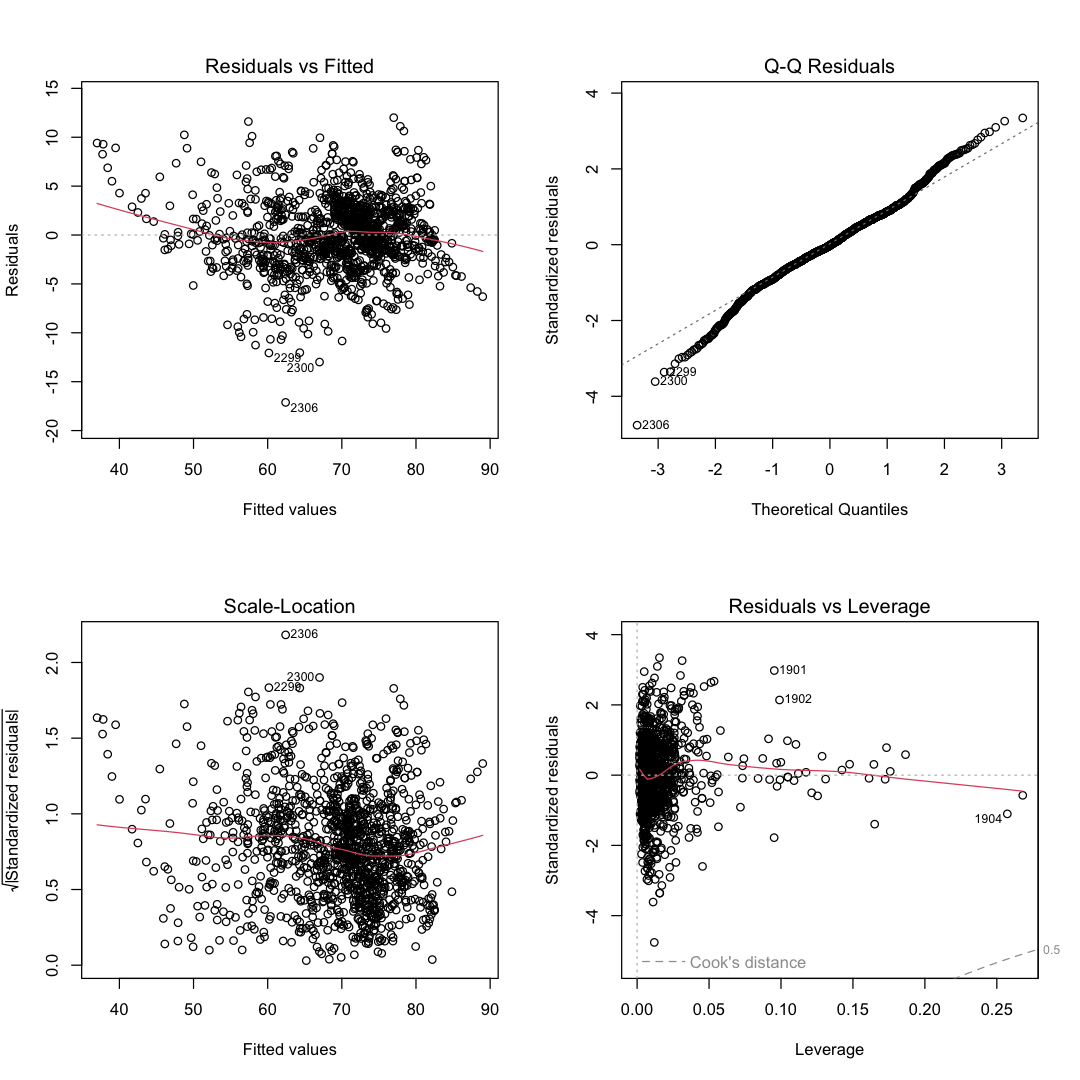

In [371]:
#create a dataframe for diagnostic
df.diagnostics = data.frame(yhat = fitted(lm_health), r = resid(lm_health), y = train$Lifeexpectancy)

#visualize the goodness of fit
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_health)

#### **Check for assumptions in linear regression:** 

##### **Linearity**

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


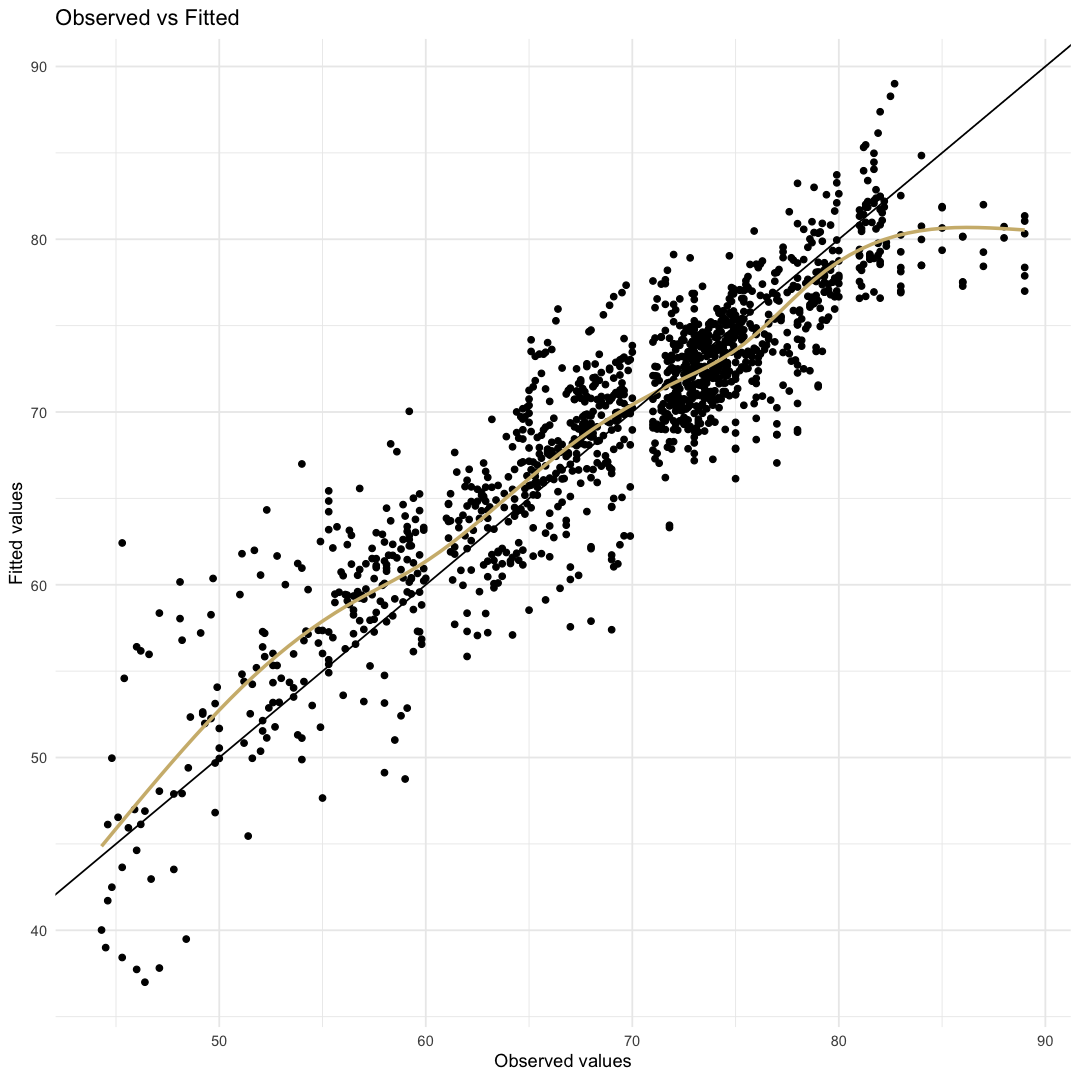

In [372]:
#create a scatter plot for observed and fitted values
ggplot(data=df.diagnostics,aes(x=y,y=yhat))+
geom_point()+
geom_smooth(se=FALSE,col='#CFB87C')+
geom_abline(intercept = 0,slope = 1) +
labs(x = "Observed values", y = "Fitted values", title = "Observed vs Fitted") +
theme_minimal()

In the observed vs. fitted value plot, we observe that the smooth line depicted is nearly linear. This suggests that the linear model has adequately captured the dependent variable.

##### **Normality**

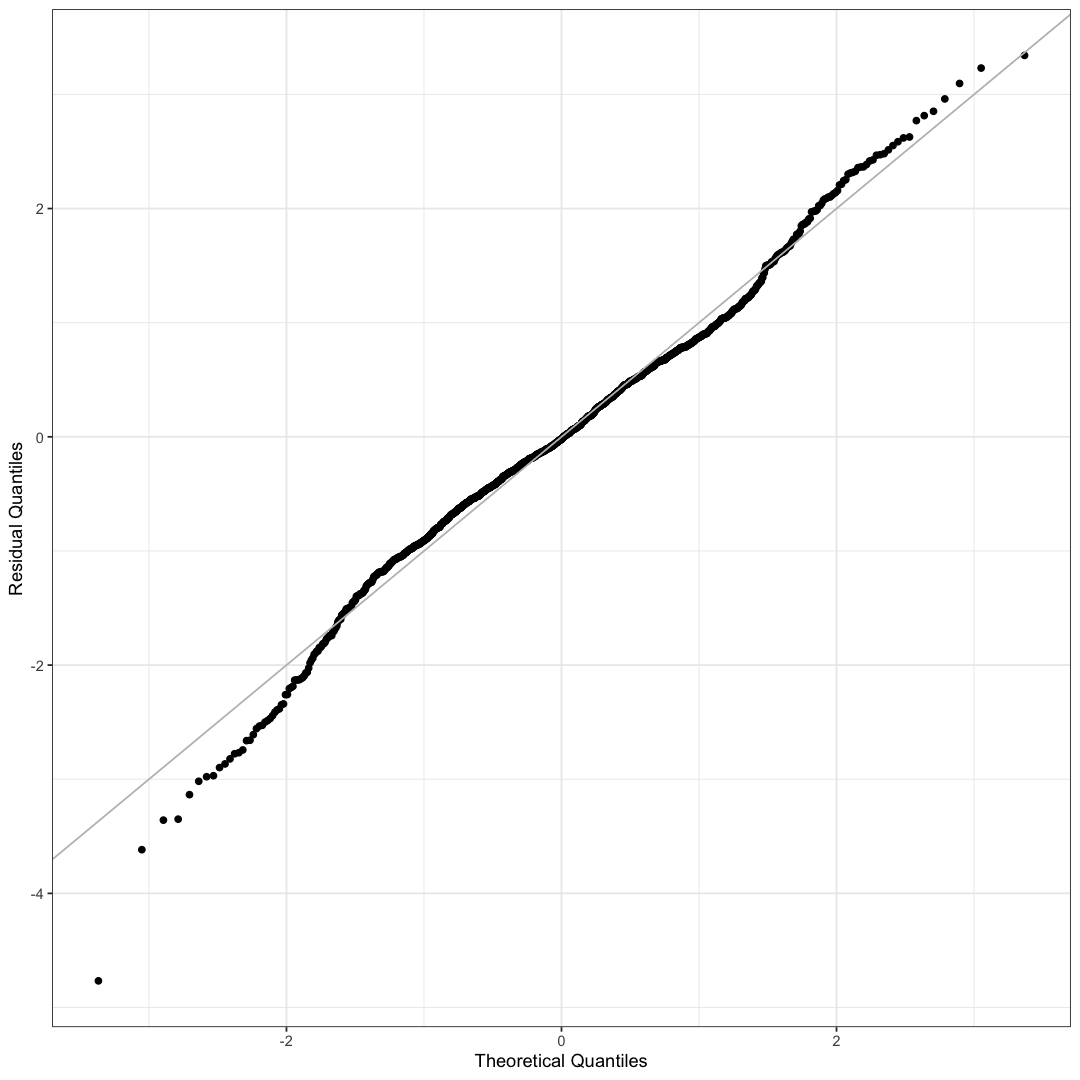

In [373]:
#create a qq plot
ggplot(df.diagnostics,aes(sample=(r-mean(r))/sd(r)))+
stat_qq()+
geom_abline(slope=1,intercept=0,col='grey')+
xlab("Theoretical Quantiles")+
ylab("Residual Quantiles")+
theme_bw()

From the quantile-quantile plot, we observe that most of the data points fall along the straight line; however, there are some outliers at the tail end, indicating non-normality in the data.

##### **Constant variance**

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


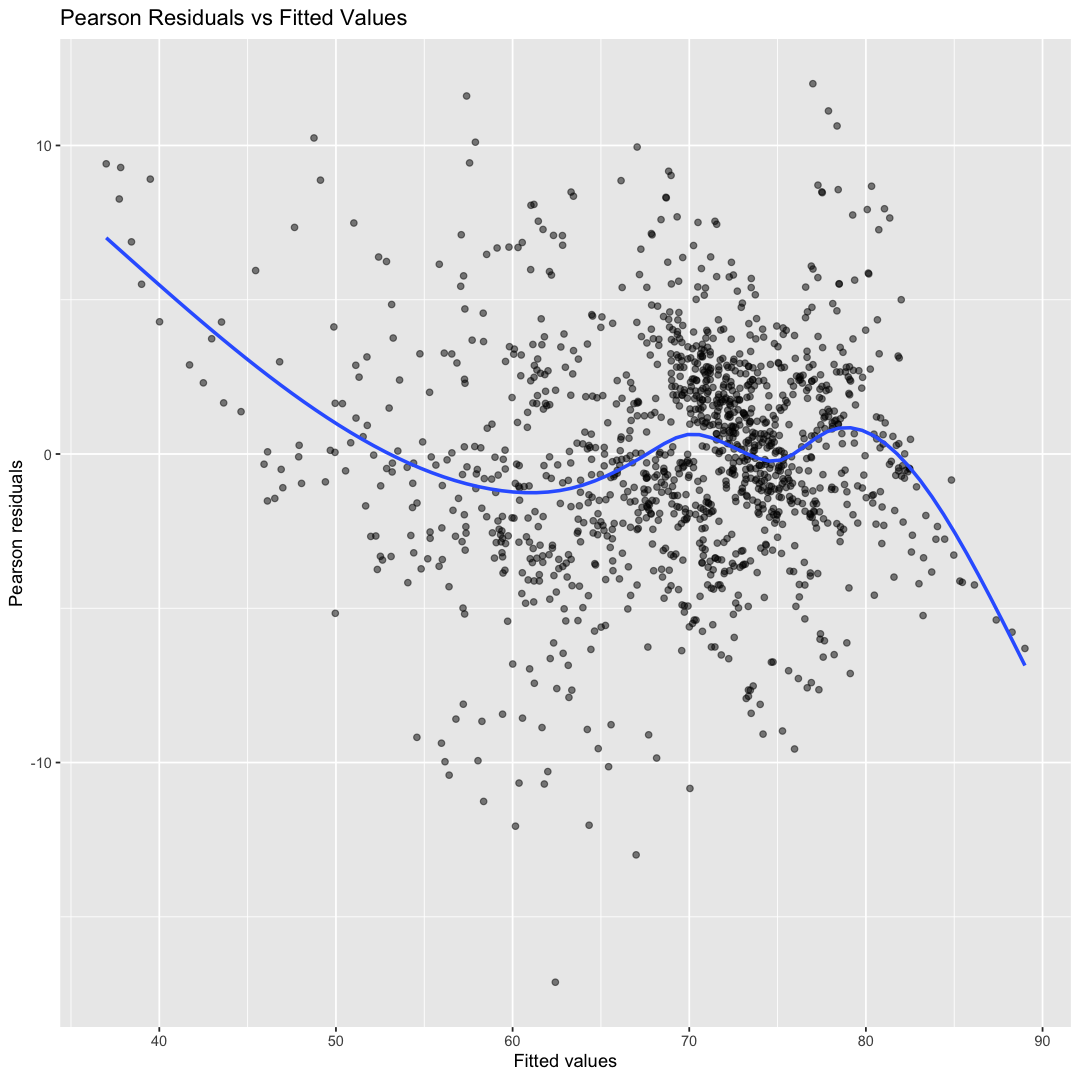

In [374]:
#check for non-constant variance using Pearson residuals
pear_res <- resid(lm_health, type = "pearson")

#create a dataframe
data <- data.frame(
  fitted_val = fitted(lm_health),
  pear_res = pear_res
)

#create a scatter plot
ggplot(data, aes(x = fitted_val, y = pear_res)) +
  geom_point(alpha = 0.5) +
  geom_smooth(se = FALSE) +
  labs(x = "Fitted values", y = "Pearson residuals",
       title = "Pearson Residuals vs Fitted Values")

From the residual vs fitted values plot, we could interpret that the variance of the residuals is not constant. Here, the variance of the residual increases as fitted values increases. 

##### **Square root transformation to overcome constant variance problem**

In [375]:
#select the features to transform
features_to_transform <- c("Lifeexpectancy","AdultMortality","infantdeaths", "Alcohol", "percentageexpenditure", "HepatitisB", "Measles", "BMI", "under.fivedeaths", "Polio", "Totalexpenditure", "Diphtheria", "HIV.AIDS", "GDP", "Population", "thinness1.19years", "thinness5.9years","Incomecompositionofresources","Schooling")

#apply square root transformation of dependent and independent features
for (feature in features_to_transform) {
  train[[paste0("sqrt_", feature)]] <- sqrt(train[[feature]])
}

lm_health_1 = lm(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + sqrt_Alcohol + sqrt_percentageexpenditure +  sqrt_HepatitisB + sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)


##### **After transformation**

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


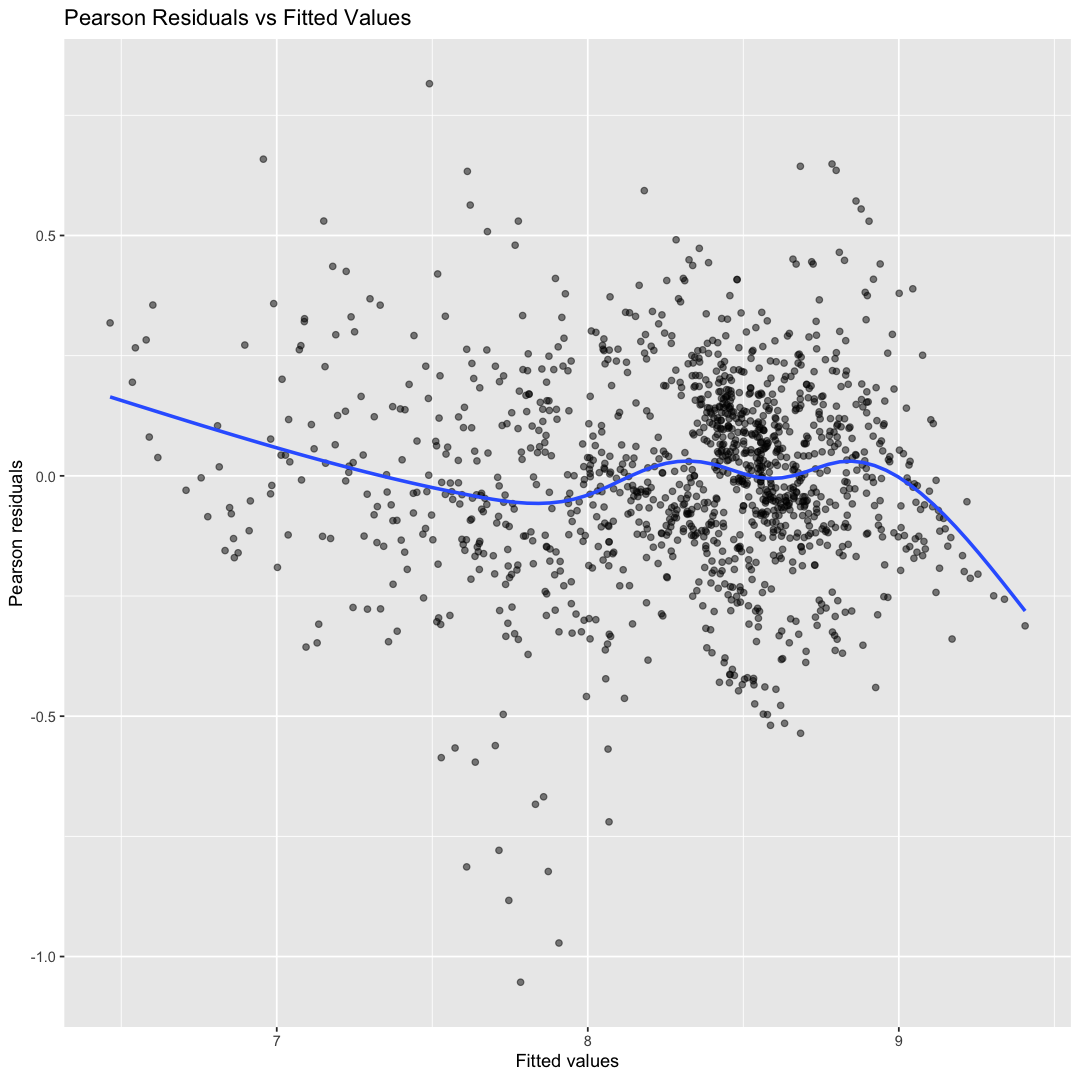

In [376]:
#check for non-constant variance using Pearson residuals
pear_res <- resid(lm_health_1, type = "pearson")

#create a dataframe
data <- data.frame(
  fitted_val = fitted(lm_health_1),
  pear_res = pear_res
)
#create a scatter plot
ggplot(data, aes(x = fitted_val, y = pear_res)) +
  geom_point(alpha = 0.5) +
  geom_smooth(se = FALSE) +
  labs(x = "Fitted values", y = "Pearson residuals",
       title = "Pearson Residuals vs Fitted Values")

We can observe a certain level of constant variance compared to the variance before the transformation.

##### **Autocorrelation:**  

In [377]:
#install required packages
#install.packages("lmtest")
#require(lmtest)
library(lmtest)

#Durbin-Watson test (Auto correlation)
dwtest(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)


	Durbin-Watson test

data:  sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths +     sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB +     sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio +     sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS +     sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years +     sqrt_Incomecompositionofresources + sqrt_Schooling
DW = 2.0137, p-value = 0.5978
alternative hypothesis: true autocorrelation is greater than 0


From the Durbin-Watson test, we can observe that the p-value is greater than 0.05 (i.e., at the 95% level of significance), suggesting that there is no autocorrelation.  

##### **Multicollinearity:**  

In [378]:
#vif
# library(car)
car::vif(lm_health_1) 

sqrt_AdultMortality                 sqrt_infantdeaths 
                         1.498238                        239.658262 
                     sqrt_Alcohol        sqrt_percentageexpenditure 
                         1.726387                         10.257771 
                  sqrt_HepatitisB                      sqrt_Measles 
                         1.479838                          1.969006 
                         sqrt_BMI             sqrt_under.fivedeaths 
                         1.635126                        236.733939 
                       sqrt_Polio             sqrt_Totalexpenditure 
                         1.427467                          1.121202 
                  sqrt_Diphtheria                     sqrt_HIV.AIDS 
                         1.707028                          1.639952 
                         sqrt_GDP                   sqrt_Population 
                        10.599814                          1.665225 
           sqrt_thinness1.19years             sqrt_thinness5.9years 
                         8.104978                          8.270170 
sqrt_Incomecompositionofresources                    sqrt_Schooling 
                         1.666836                          3.029227

From the VIF results, we can see that some the scores fall above 5, suggesting that there is multicollinearity. 

#### **Feature selection using forward selection**

In [379]:
forward_select <- function(train, resp_str, maxk) {
  y <- train[[resp_str]]
  #create a list
  selected_features <- c()
  all_features <- c("sqrt_AdultMortality", "sqrt_infantdeaths", "sqrt_Alcohol", "sqrt_percentageexpenditure", "sqrt_HepatitisB", "sqrt_Measles", "sqrt_BMI", "sqrt_under.fivedeaths", "sqrt_Polio", "sqrt_Totalexpenditure", "sqrt_Diphtheria", "sqrt_HIV.AIDS", "sqrt_GDP", "sqrt_Population", "sqrt_thinness1.19years", "sqrt_thinness5.9years", "sqrt_Incomecompositionofresources", "sqrt_Schooling")
  
  #forward selection
  for (k in 1:maxk) {
    low_err <- Inf
    best_feature <- NULL
    
    #iterate over all features
    for (feature in all_features) {
      features_to_try <- c(selected_features, feature)
      
      #fit the model
      model <- lm(formula = paste(resp_str, "~", paste(features_to_try, collapse = "+")), data = train)
      #find sse
      sse <- sum(model$residuals^2)
      
      #model selection
      if (sse < low_err) {
        low_err <- sse
        best_feature <- feature
      }
    }
    
    #add the best feature 
    selected_features <- c(selected_features, best_feature)
    all_features <- all_features[!all_features %in% best_feature]
    
    #print the best feature
    cat("Stage", k, ":", best_feature, "\n")
  }
  
  return(selected_features)
}

selected_features <- forward_select(train, "sqrt_Lifeexpectancy", 10)
selected_features

Stage 1 : sqrt_HIV.AIDS 
Stage 2 : sqrt_Schooling 
Stage 3 : sqrt_AdultMortality 
Stage 4 : sqrt_percentageexpenditure 
Stage 5 : sqrt_Incomecompositionofresources 
Stage 6 : sqrt_under.fivedeaths 
Stage 7 : sqrt_infantdeaths 
Stage 8 : sqrt_thinness5.9years 
Stage 9 : sqrt_Alcohol 
Stage 10 : sqrt_Totalexpenditure 


[1] "sqrt_HIV.AIDS"                     "sqrt_Schooling"                   
 [3] "sqrt_AdultMortality"               "sqrt_percentageexpenditure"       
 [5] "sqrt_Incomecompositionofresources" "sqrt_under.fivedeaths"            
 [7] "sqrt_infantdeaths"                 "sqrt_thinness5.9years"            
 [9] "sqrt_Alcohol"                      "sqrt_Totalexpenditure"

### 3. t-test

**Null hypothesis:** There is no significant difference in the mean life expectancy between countries classified as "Developing" and "Developed.  

**$$H_0: \mu_{\text{Developing}} = \mu_{\text{Developed}}$$**

**Alternate hypothesis:** There is a significant difference in the mean life expectancy between countries classified as "Developing" and "Developed.  

 **$$H_a: \mu_{\text{Developing}} \neq \mu_{\text{Developed}}$$**

In [380]:
# Divide the data into two groups based on the 'Status' variable
developing_group <- train[train$Status == "Developing", "Lifeexpectancy"]
developed_group <- train[train$Status == "Developed", "Lifeexpectancy"]

# Perform the t-test
t_test_result <- t.test(developing_group, developed_group)

# Print the result
print(t_test_result)


	Welch Two Sample t-test

data:  developing_group and developed_group
t = -27.564, df = 479, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.58409 -10.04243
sample estimates:
mean of x mean of y 
 67.79426  78.60753 



We observe that the p-value is less than the 95% level of significance. This indicates a significant difference in the mean life expectancy between developed and developing countries. Therefore, we reject the null hypothesis.

### 4. Model Selection – AIC, BIC, MSPE, R^2, Ra^2

In [219]:
#display the summary statistics
summary(lm_health_1)

#select the features to transform
features_to_transform <- c("Lifeexpectancy","AdultMortality","infantdeaths", "Alcohol", "percentageexpenditure", "HepatitisB", "Measles", "BMI", "under.fivedeaths", "Polio", "Totalexpenditure", "Diphtheria", "HIV.AIDS", "GDP", "Population", "thinness1.19years", "thinness5.9years","Incomecompositionofresources","Schooling")

#apply square root transformation to features in test data
for (feature in features_to_transform) {
  test[[paste0("sqrt_", feature)]] <- sqrt(test[[feature]])
}

#predict with test data
pred_test <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe <- mean((test$sqrt_Lifeexpectancy - pred_test)^2)
cat('Mean squared prediction error:', mspe)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + 
    sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + 
    sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + 
    sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05339 -0.11852 -0.00187  0.13085  0.81574 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.157e+00  8.920e-02  80.231  < 2e-16 ***
sqrt_AdultMortality               -1.491e-02  1.411e-03 -10.567  < 2e-16 ***
sqrt_infantdeaths                  1.610e-01  1.889e-02   8.527  < 2e-16 ***
sqrt_Alcohol                       2.072e-02  6.926e-03   2.991  0.00283 ** 
sqrt_percentageexpenditure         4.933e-03  9.639e-04   5.

Mean squared prediction error: 0.03915834

Here, we see that several of the predictors have t-tests with high p-values (higher than the standard $\alpha = 0.05$). Instead of just removing all of those, let's perform backward selection, removing the predictor with the largest p-value greater than $\alpha_0 = 0.15$.

In [220]:
lm_health_1 = update(lm_health_1, . ~ . -sqrt_Polio)
summary(lm_health_1)

#predict with test data
pred_test_1 <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe_1 <- mean((test$sqrt_Lifeexpectancy - pred_test_1)^2)
cat('Mean squared prediction error:', mspe_1)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Totalexpenditure + 
    sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_Population + 
    sqrt_thinness1.19years + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + 
    sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05369 -0.11871 -0.00176  0.13014  0.81620 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.160e+00  8.840e-02  80.993  < 2e-16 ***
sqrt_AdultMortality               -1.492e-02  1.409e-03 -10.587  < 2e-16 ***
sqrt_infantdeaths                  1.613e-01  1.886e-02   8.553  < 2e-16 ***
sqrt_Alcohol                       2.084e-02  6.907e-03   3.017   0.0026 ** 
sqrt_percentageexpenditure         4.924e-03  9.629e-04   5.114 3.63e-07 

Mean squared prediction error: 0.03917008

In [221]:
lm_health_1 = update(lm_health_1, . ~ . -sqrt_Population)
summary(lm_health_1)

#predict with test data
pred_test_2 <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe_2 <- mean((test$sqrt_Lifeexpectancy - pred_test_2)^2)
cat('Mean squared prediction error:', mspe_2)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Totalexpenditure + 
    sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_thinness1.19years + 
    sqrt_thinness5.9years + sqrt_Incomecompositionofresources + 
    sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05505 -0.11827 -0.00137  0.12993  0.81978 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.1547244  0.0876536  81.625  < 2e-16 ***
sqrt_AdultMortality               -0.0148968  0.0014079 -10.581  < 2e-16 ***
sqrt_infantdeaths                  0.1623762  0.0186874   8.689  < 2e-16 ***
sqrt_Alcohol                       0.0209865  0.0068969   3.043  0.00239 ** 
sqrt_percentageexpenditure         0.0049510  0.0009607   5.154 2.95e-07 ***
sqrt_Hepatitis

Mean squared prediction error: 0.03928312

In [222]:
lm_health_1 = update(lm_health_1, . ~ . -sqrt_thinness1.19years)
summary(lm_health_1)

#predict with test data
pred_test_3 <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe_3 <- mean((test$sqrt_Lifeexpectancy - pred_test_3)^2)
cat('Mean squared prediction error:', mspe_3)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Totalexpenditure + 
    sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_thinness5.9years + 
    sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05447 -0.11824 -0.00063  0.13087  0.79866 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.1594562  0.0872334  82.072  < 2e-16 ***
sqrt_AdultMortality               -0.0149490  0.0014045 -10.643  < 2e-16 ***
sqrt_infantdeaths                  0.1620329  0.0186727   8.678  < 2e-16 ***
sqrt_Alcohol                       0.0206342  0.0068671   3.005  0.00271 ** 
sqrt_percentageexpenditure         0.0049437  0.0009604   5.148 3.04e-07 ***
sqrt_HepatitisB                   -0.0036191

Mean squared prediction error: 0.03935414

In [223]:
lm_health_1 = update(lm_health_1, . ~ . -sqrt_Measles)
summary(lm_health_1)

#predict with test data
pred_test_4 <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe_4 <- mean((test$sqrt_Lifeexpectancy - pred_test_4)^2)
cat('Mean squared prediction error:', mspe_4)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_BMI + sqrt_under.fivedeaths + sqrt_Totalexpenditure + 
    sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_thinness5.9years + 
    sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06017 -0.11828 -0.00087  0.13035  0.80184 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.1606761  0.0872177  82.101  < 2e-16 ***
sqrt_AdultMortality               -0.0149975  0.0014034 -10.686  < 2e-16 ***
sqrt_infantdeaths                  0.1659640  0.0181702   9.134  < 2e-16 ***
sqrt_Alcohol                       0.0209032  0.0068604   3.047  0.00236 ** 
sqrt_percentageexpenditure         0.0049223  0.0009600   5.127 3.38e-07 ***
sqrt_HepatitisB                   -0.0037883  0.0035082  -1

Mean squared prediction error: 0.03921202

In [224]:
lm_health_1 = update(lm_health_1, . ~ . -sqrt_HepatitisB)
summary(lm_health_1)

#predict with test data
pred_test_5 <- predict(lm_health_1, newdata = test)

#compute MSPE
mspe_5 <- mean((test$sqrt_Lifeexpectancy - pred_test_5)^2)
cat('Mean squared prediction error:', mspe_5)


Call:
lm(formula = sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_BMI + sqrt_under.fivedeaths + 
    sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + 
    sqrt_GDP + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + 
    sqrt_Schooling, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06197 -0.11628 -0.00199  0.12964  0.80227 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        7.1517961  0.0868347  82.361  < 2e-16 ***
sqrt_AdultMortality               -0.0150725  0.0014018 -10.752  < 2e-16 ***
sqrt_infantdeaths                  0.1666378  0.0181606   9.176  < 2e-16 ***
sqrt_Alcohol                       0.0210117  0.0068601   3.063  0.00224 ** 
sqrt_percentageexpenditure         0.0049657  0.0009592   5.177 2.61e-07 ***
sqrt_BMI                           0.0074379  0.0039497   1.883  0.05990 .  


Mean squared prediction error: 0.03920691

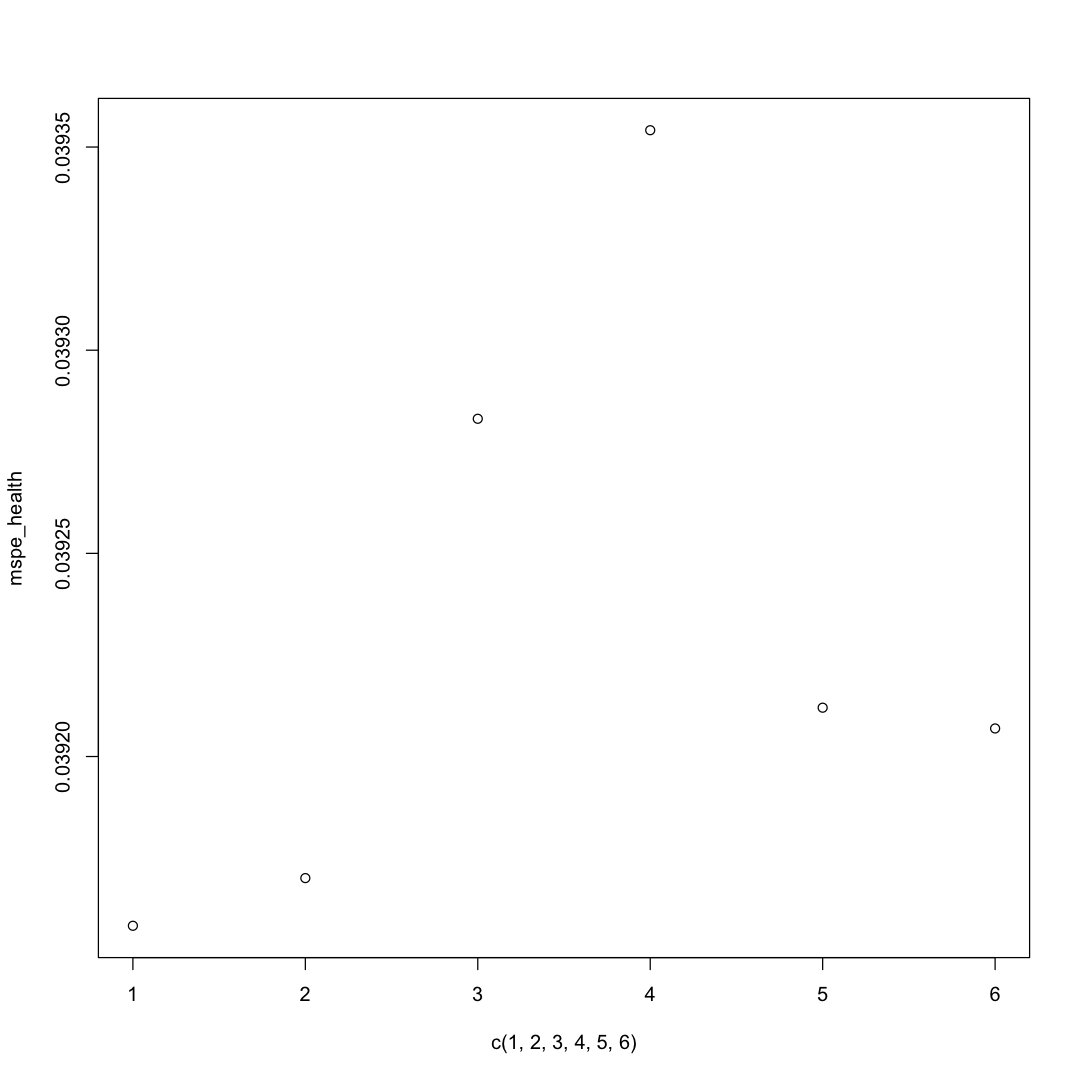

In [225]:
#plot mspe
mspe_health= c(mspe, mspe_1, mspe_2, mspe_3, mspe_4, mspe_5)
plot(c(1,2,3,4,5,6),mspe_health)

We observe that the best model considers all features, as the mean squared prediction error is very low. However, we could also consider a model without the features Polio, Population, thinness1.19years, and Measles, as they resulted in a mean squared prediction error that is closer to the model considering all features, though slightly higher.

In [226]:
library(leaps)
library(MASS)
reg1 <- regsubsets(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + sqrt_Schooling, 
                   data = train,
                   nvmax = 19)
               
rs <- summary(reg1)
rs$which

(Intercept) sqrt_AdultMortality sqrt_infantdeaths sqrt_Alcohol
1  TRUE        FALSE               FALSE             FALSE       
2  TRUE        FALSE               FALSE             FALSE       
3  TRUE         TRUE               FALSE             FALSE       
4  TRUE         TRUE               FALSE             FALSE       
5  TRUE         TRUE               FALSE             FALSE       
6  TRUE         TRUE                TRUE             FALSE       
7  TRUE         TRUE                TRUE             FALSE       
8  TRUE         TRUE                TRUE             FALSE       
9  TRUE         TRUE                TRUE              TRUE       
10 TRUE         TRUE                TRUE              TRUE       
11 TRUE         TRUE                TRUE              TRUE       
12 TRUE         TRUE                TRUE              TRUE       
13 TRUE         TRUE                TRUE              TRUE       
14 TRUE         TRUE                TRUE              TRUE       
15 TRUE         TRUE                TRUE              TRUE       
16 TRUE         TRUE                TRUE              TRUE       
17 TRUE         TRUE                TRUE              TRUE       
18 TRUE         TRUE                TRUE              TRUE       
   sqrt_percentageexpenditure sqrt_HepatitisB sqrt_Measles sqrt_BMI
1  FALSE                      FALSE           FALSE        FALSE   
2  FALSE                      FALSE           FALSE        FALSE   
3  FALSE                      FALSE           FALSE        FALSE   
4   TRUE                      FALSE           FALSE        FALSE   
5   TRUE                      FALSE           FALSE        FALSE   
6   TRUE                      FALSE           FALSE        FALSE   
7   TRUE                      FALSE           FALSE        FALSE   
8   TRUE                      FALSE           FALSE        FALSE   
9   TRUE                      FALSE           FALSE        FALSE   
10  TRUE                      FALSE           FALSE        FALSE   
11  TRUE                      FALSE           FALSE        FALSE   
12  TRUE                      FALSE           FALSE         TRUE   
13  TRUE                      FALSE           FALSE         TRUE   
14  TRUE                       TRUE           FALSE         TRUE   
15  TRUE                       TRUE            TRUE         TRUE   
16  TRUE                       TRUE            TRUE         TRUE   
17  TRUE                       TRUE            TRUE         TRUE   
18  TRUE                       TRUE            TRUE         TRUE   
   sqrt_under.fivedeaths sqrt_Polio sqrt_Totalexpenditure sqrt_Diphtheria
1  FALSE                 FALSE      FALSE                 FALSE          
2  FALSE                 FALSE      FALSE                 FALSE          
3  FALSE                 FALSE      FALSE                 FALSE          
4  FALSE                 FALSE      FALSE                 FALSE          
5  FALSE                 FALSE      FALSE                 FALSE          
6   TRUE                 FALSE      FALSE                 FALSE          
7   TRUE                 FALSE      FALSE                 FALSE          
8   TRUE                 FALSE      FALSE                 FALSE          
9   TRUE                 FALSE      FALSE                 FALSE          
10  TRUE                 FALSE       TRUE                 FALSE          
11  TRUE                 FALSE       TRUE                  TRUE          
12  TRUE                 FALSE       TRUE                  TRUE          
13  TRUE                 FALSE       TRUE                  TRUE          
14  TRUE                 FALSE       TRUE                  TRUE          
15  TRUE                 FALSE       TRUE                  TRUE          
16  TRUE                 FALSE       TRUE                  TRUE          
17  TRUE                 FALSE       TRUE                  TRUE          
18  TRUE                  TRUE       TRUE                  TRUE          
   sqrt_HIV.AIDS sqrt_GDP sqrt_Population sqrt_thin

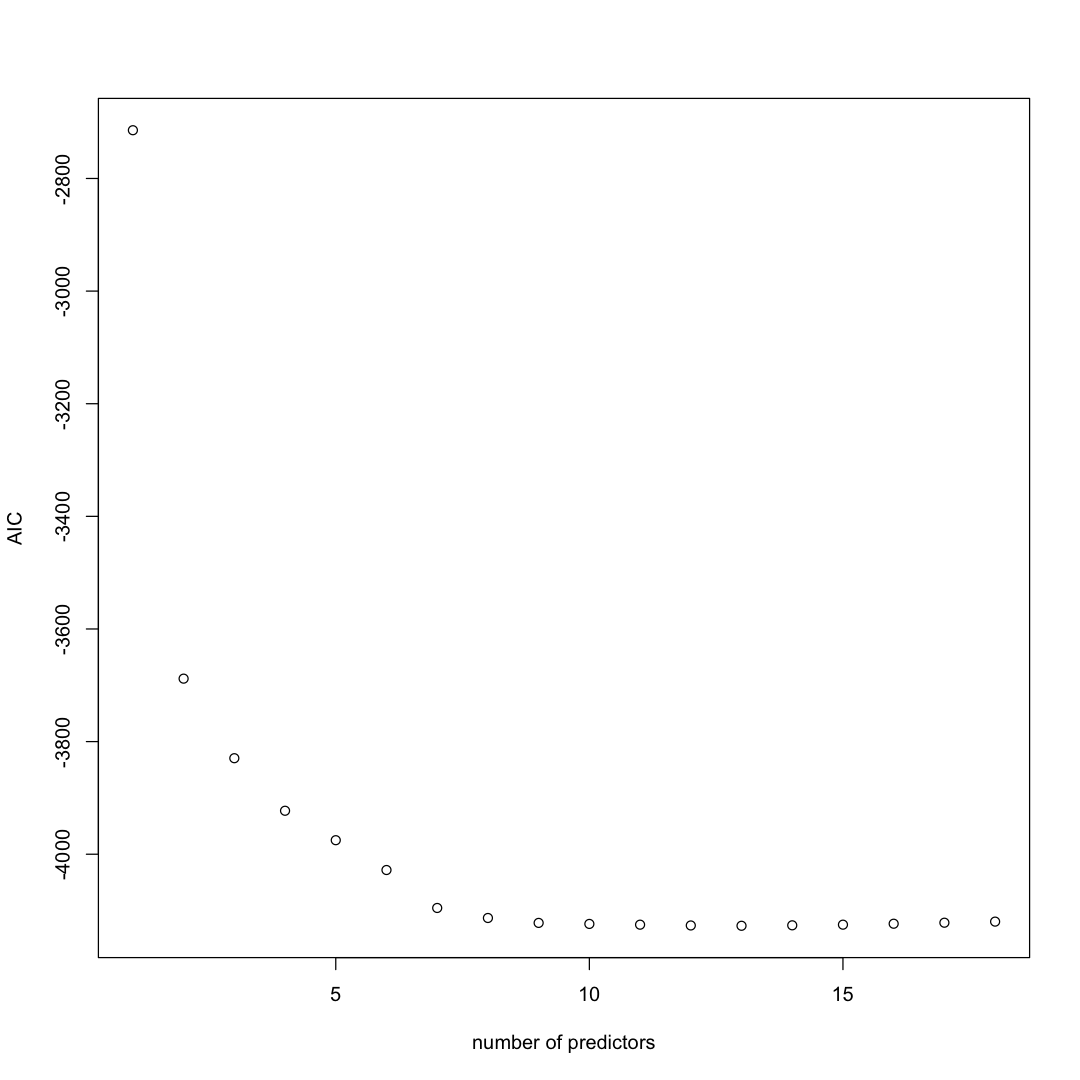

In [227]:
#calculate AIC
#plot AIC values
AIC = 2*(2:19) + n*log(rs$rss/n) 
plot(AIC ~ I(1:18), xlab = "number of predictors", ylab = "AIC")

In [228]:
#AIC values
AIC

[1] -2714.317 -3688.193 -3829.495 -3922.810 -3975.094 -4028.046 -4095.437
 [8] -4113.229 -4121.959 -4123.779 -4125.115 -4126.508 -4127.068 -4126.247
[15] -4125.093 -4123.419 -4121.618 -4119.684

In this plot, we observe that the model of size k = 13 has the lowest AIC.

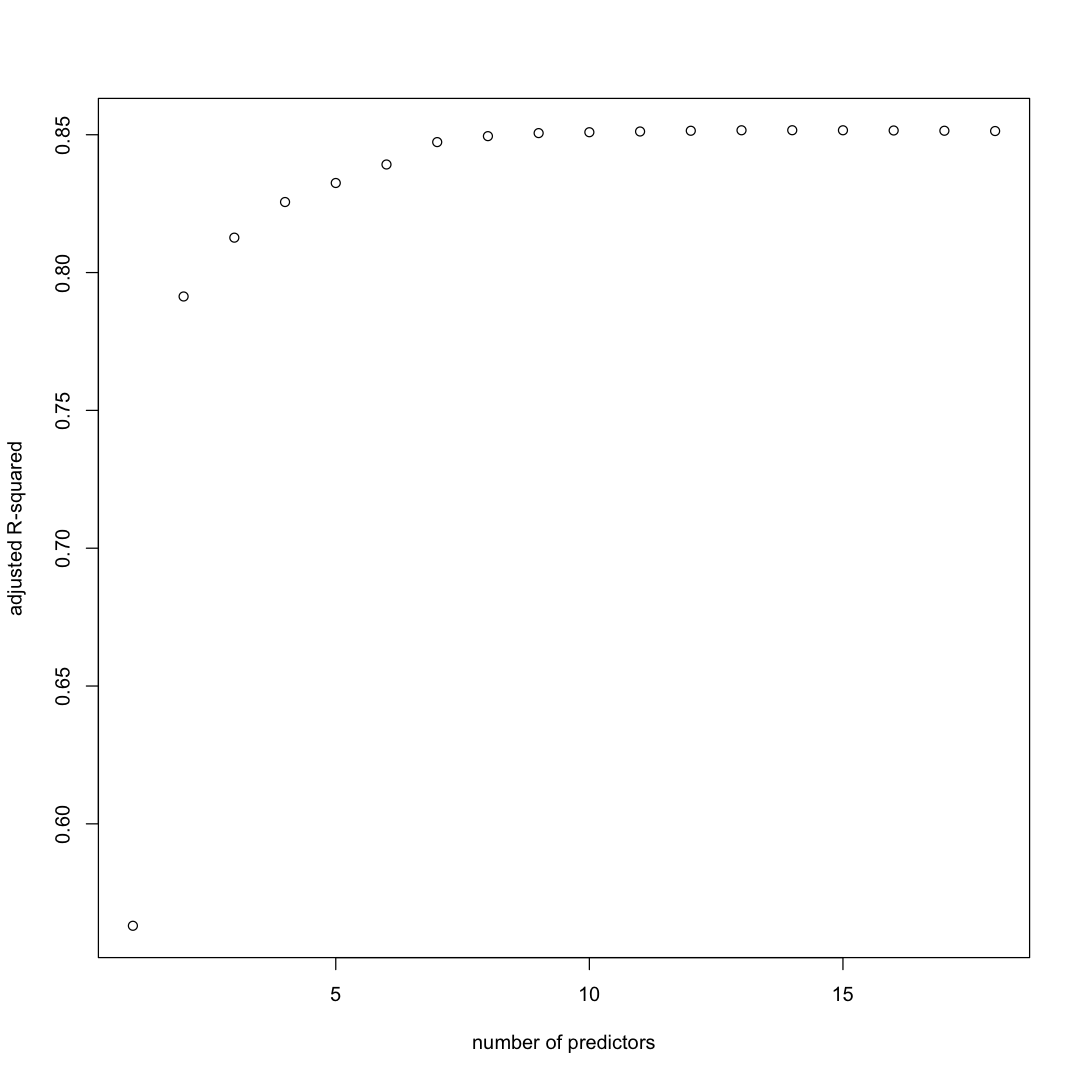

In [229]:
#calculate adj r2
#plot adj r2 values
plot(1:18, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In [230]:
#adj r^2 values
rs$adjr2

[1] 0.5630204 0.7913235 0.8126645 0.8255917 0.8324964 0.8392091 0.8473331
 [8] 0.8494920 0.8505974 0.8509155 0.8511783 0.8514470 0.8516214 0.8516403
[15] 0.8516217 0.8515444 0.8514527 0.8513459

The adjusted R^2 suggests that the optimal number of predictors is 14.

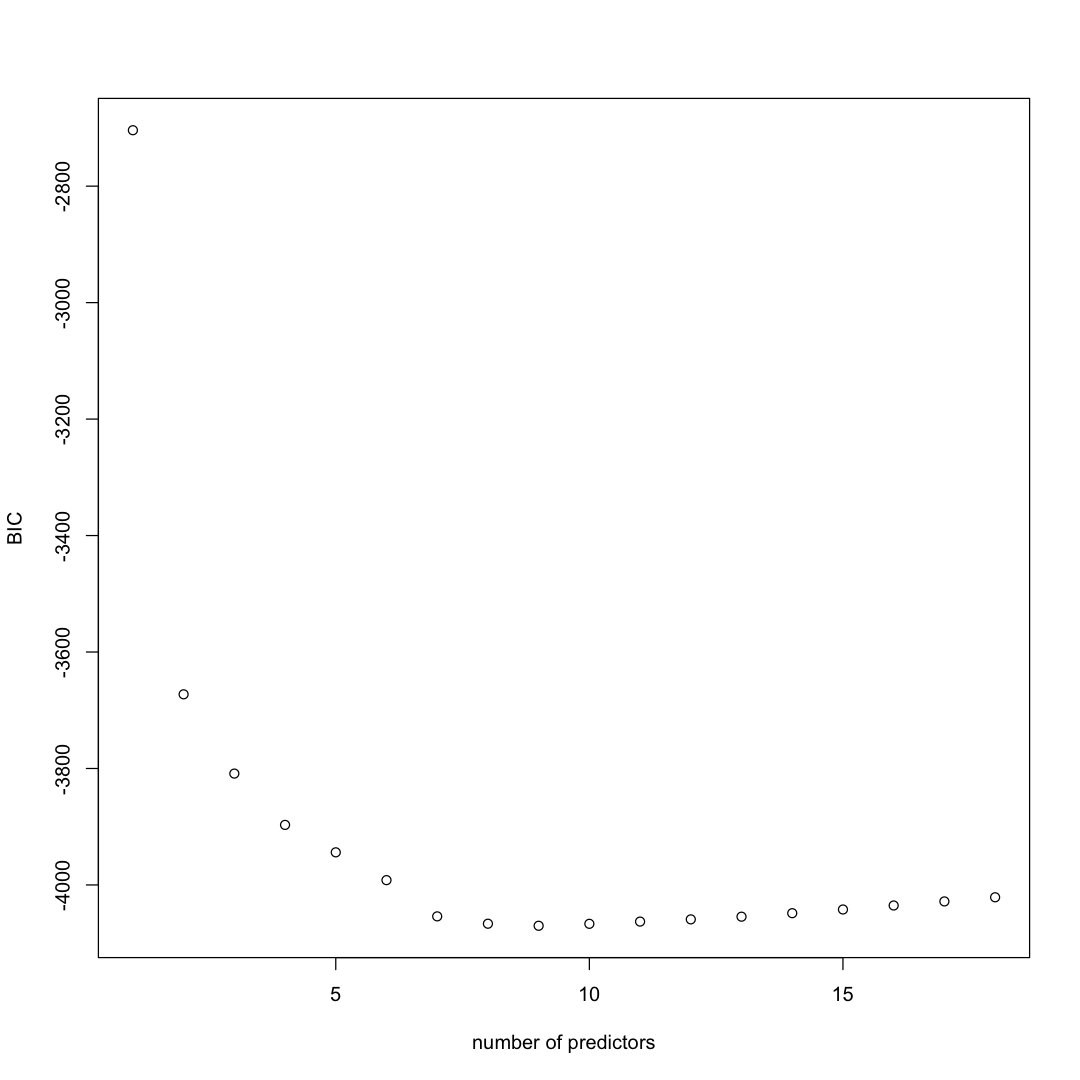

In [231]:
#calculate BIC
#plot BIC values
BIC = log(n)*(2:19) + n*log(rs$rss/n) 
plot(BIC ~ I(1:18), xlab = "number of predictors", ylab = "BIC")

In [232]:
#BIC values
BIC

[1] -2703.948 -3672.639 -3808.757 -3896.887 -3943.986 -3991.754 -4053.960
 [8] -4066.567 -4070.113 -4066.748 -4062.900 -4059.107 -4054.483 -4048.477
[15] -4042.139 -4035.281 -4028.295 -4021.176

The BIC value suggests that the optimal number of predictors is 9.

All the criteria shows a different model with,  

AIC - 13 predictors  
BIC - 9 predictors  
Adj r^2 - 14 predictors  

### 5. F-test

We considered 13 predictors based on the results from the AIC and backward selection model, which yielded a lower mean squared prediction error.

In [391]:
#fit the model
full_model = lm(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)
reduced_model=lm(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + sqrt_GDP + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + sqrt_Schooling, data = train)
# reduced_model=lm(sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_Alcohol +sqrt_HepatitisB + sqrt_Totalexpenditure + sqrt_HIV.AIDS +  sqrt_thinness1.19years + sqrt_Incomecompositionofresources, data = train)

# Perform the F-test
f_test_result <- anova(reduced_model, full_model)

# Print the result
print(f_test_result)

Analysis of Variance Table

Model 1: sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_BMI + sqrt_under.fivedeaths + 
    sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + 
    sqrt_GDP + sqrt_thinness5.9years + sqrt_Incomecompositionofresources + 
    sqrt_Schooling
Model 2: sqrt_Lifeexpectancy ~ sqrt_AdultMortality + sqrt_infantdeaths + 
    sqrt_Alcohol + sqrt_percentageexpenditure + sqrt_HepatitisB + 
    sqrt_Measles + sqrt_BMI + sqrt_under.fivedeaths + sqrt_Polio + 
    sqrt_Totalexpenditure + sqrt_Diphtheria + sqrt_HIV.AIDS + 
    sqrt_GDP + sqrt_Population + sqrt_thinness1.19years + sqrt_thinness5.9years + 
    sqrt_Incomecompositionofresources + sqrt_Schooling
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1   1305 56.513                           
2   1300 56.401  5   0.11199 0.5163 0.7641


We observe a p-value greater than the 95% level of significance. Therefore, we conclude that the reduced model is not as effective as the full model.

## Project report

**1. Introduction**

**1.1 Background**  

This study aims to explore disparities in life expectancy across various countries. Data spanning from 2000 to 2015 is analyzed to uncover the underlying factors contributing to these variations. The goal is to provide insights that can assist policymakers and healthcare practitioners in formulating strategies to enhance overall population health and mitigate global health inequalities.  

**1.2 Motivation Behind the Study**  

This study caught my attention because it allows me to explore what makes people live longer and understand the factors that influence life expectancy. Additionally, by uncovering these insights, I can potentially contribute to the development of policies and interventions aimed at improving public health and increasing life expectancy globally.  

**1.3 Prior Research**  

This dataset, being observational data, has been the subject of numerous research studies, particularly in analyzing the effectiveness of healthcare access. I conducted an analysis using statistical techniques to identify factors contributing to increased life expectancy. This involved applying various regression models to uncover key determinants.

**1.4 Data Origin**  

The dataset contains information from the World Health Organization's Global Health Observatory (GHO) and the United Nations website. It covers 193 countries and includes data on life expectancy, various health factors, and economic indicators such as GDP and poverty rates. This dataset is valuable for research in public health, healthcare policy-making, and socio-economic studies. It helps understand the relationship between health outcomes, socio-economic factors, and policy interventions globally.  

**1.5 Questions of interest**  

1. What factors influence life expectancy?
2. Is there a significant difference in life expectancy between developed and developing countries?
3. Does the data adhere to linear regression assumptions?
4. Does education in a respective country help improve life expectancy?
5. Is there a correlation between BMI and life expectancy?  

**2. Methods**  

**2.1 Data Collection**  

The dataset used in this analysis was sourced from Kaggle and is also accessible on the World Health Organization website. The Kaggle dataset consolidates information from multiple files available on the website.  

**2.2 Exploratory Data Analysis**  

**2.2.1 Distribution of Life expectancy**

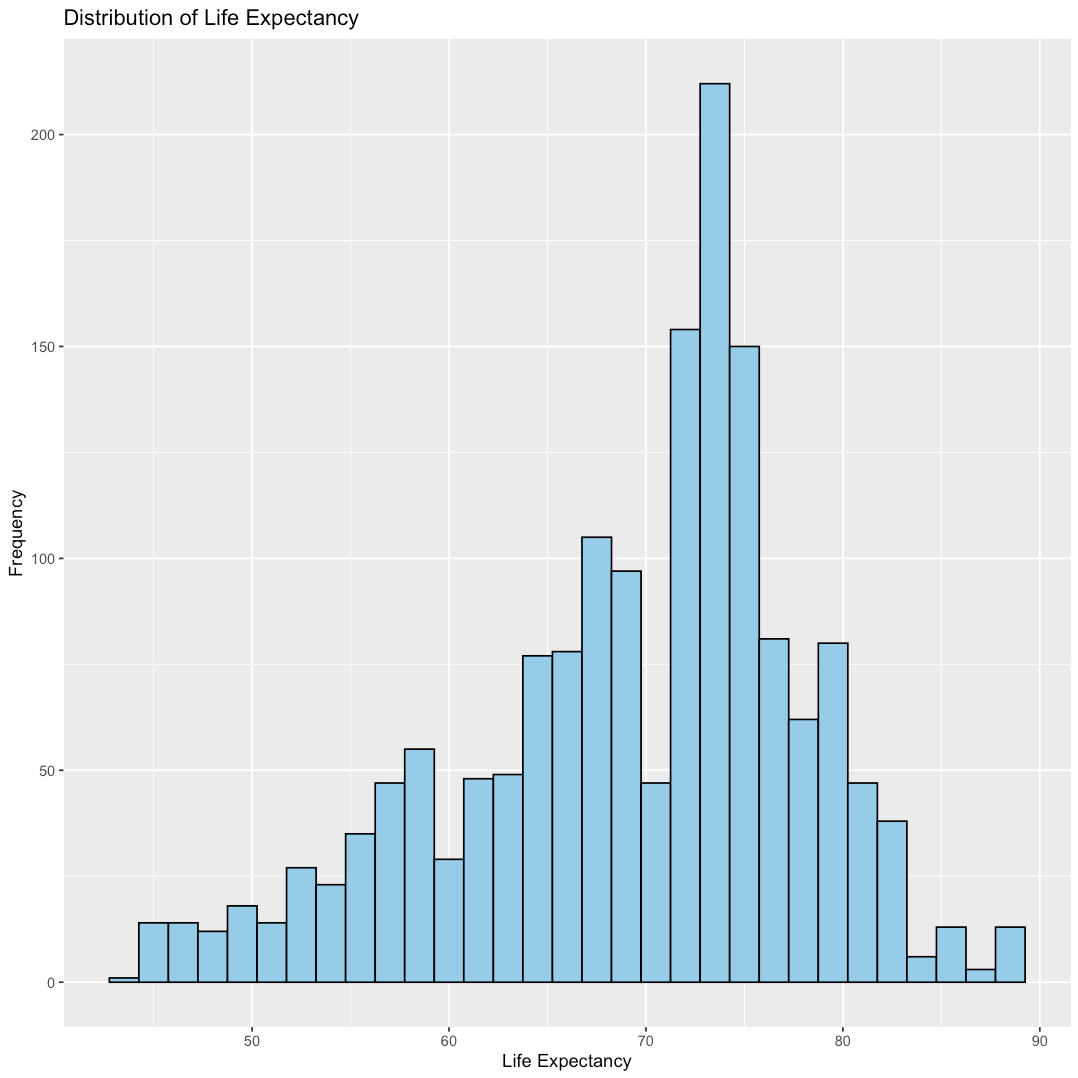

We can observe that the distribution of life expectancy is skewed to the left.  

**2.2.2 Comparison of Percentage Expenditure by Life Expectancy Category**

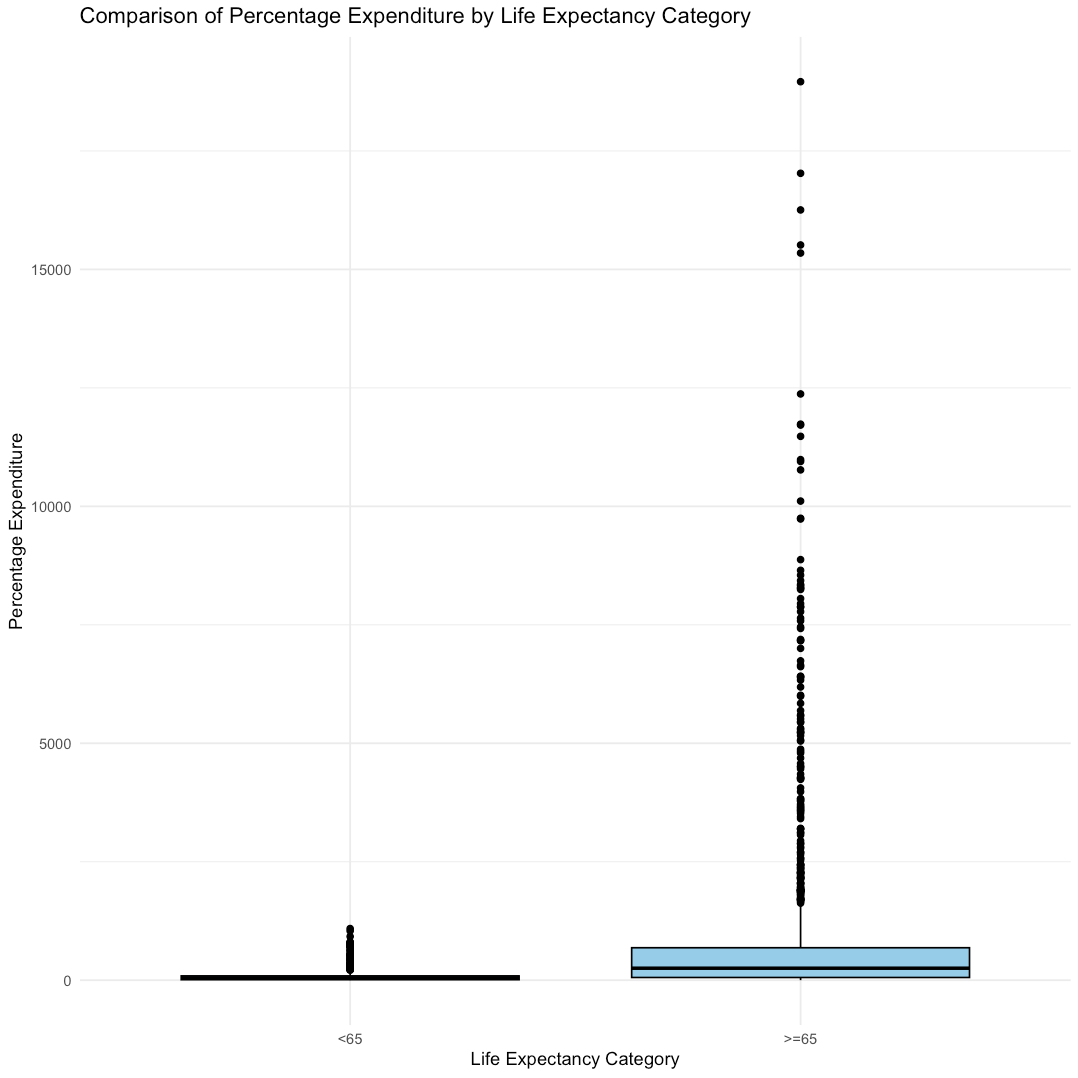

We can observe that individuals who spend more on healthcare tend to have longer life expectancies, as shown by the presence of more outliers in the box plot.  

**2.2.3 Relationship between Life Expectancy and Alcohol Consumption**  

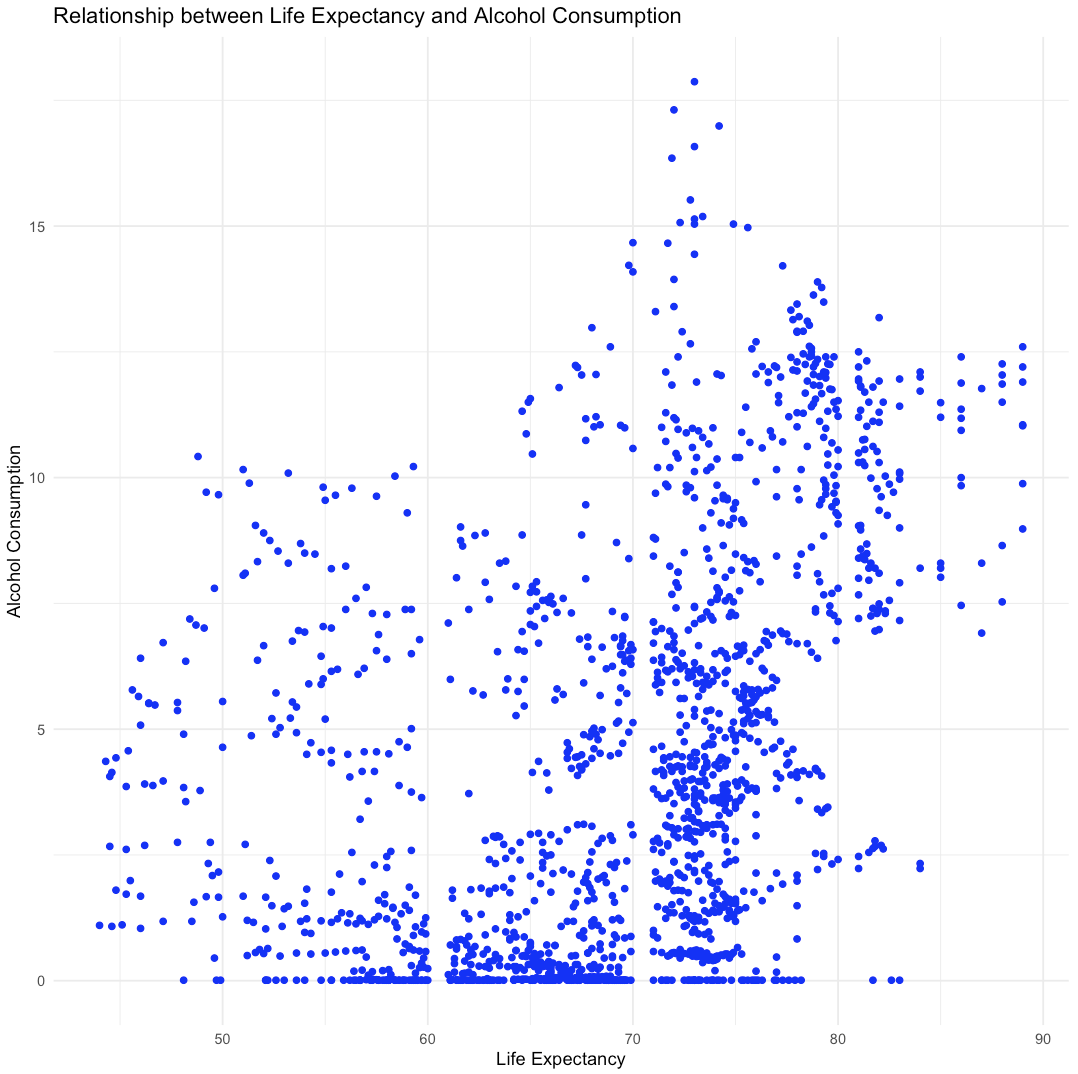

We observe a slight increase in life expectancy with higher levels of alcohol consumption; however, we cannot conclusively state that individuals tend to live longer as alcohol consumption increases.  

**2.2.4 Comparison of Life Expectancy Distributions by Schooling Category**  

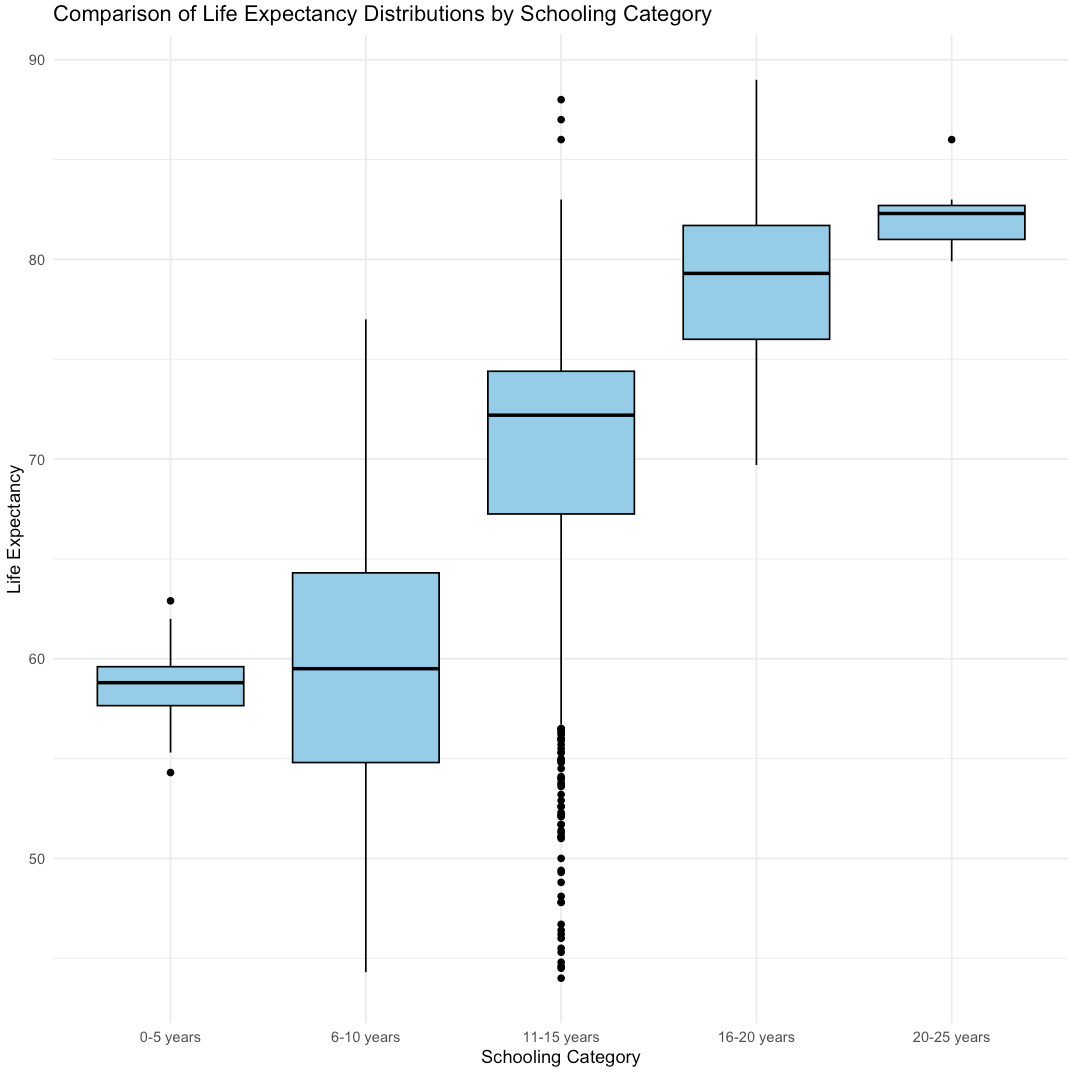

We can observe that the mean life expectancy increases as the number of years of education increases. Overall, we can see that if an individual has 10 or more years of education, they tend to live longer. This might be because they have more knowledge about which dietary habits to follow and what needs to be considered to increase life expectancy.

**2.2.5 Correlation with features**  

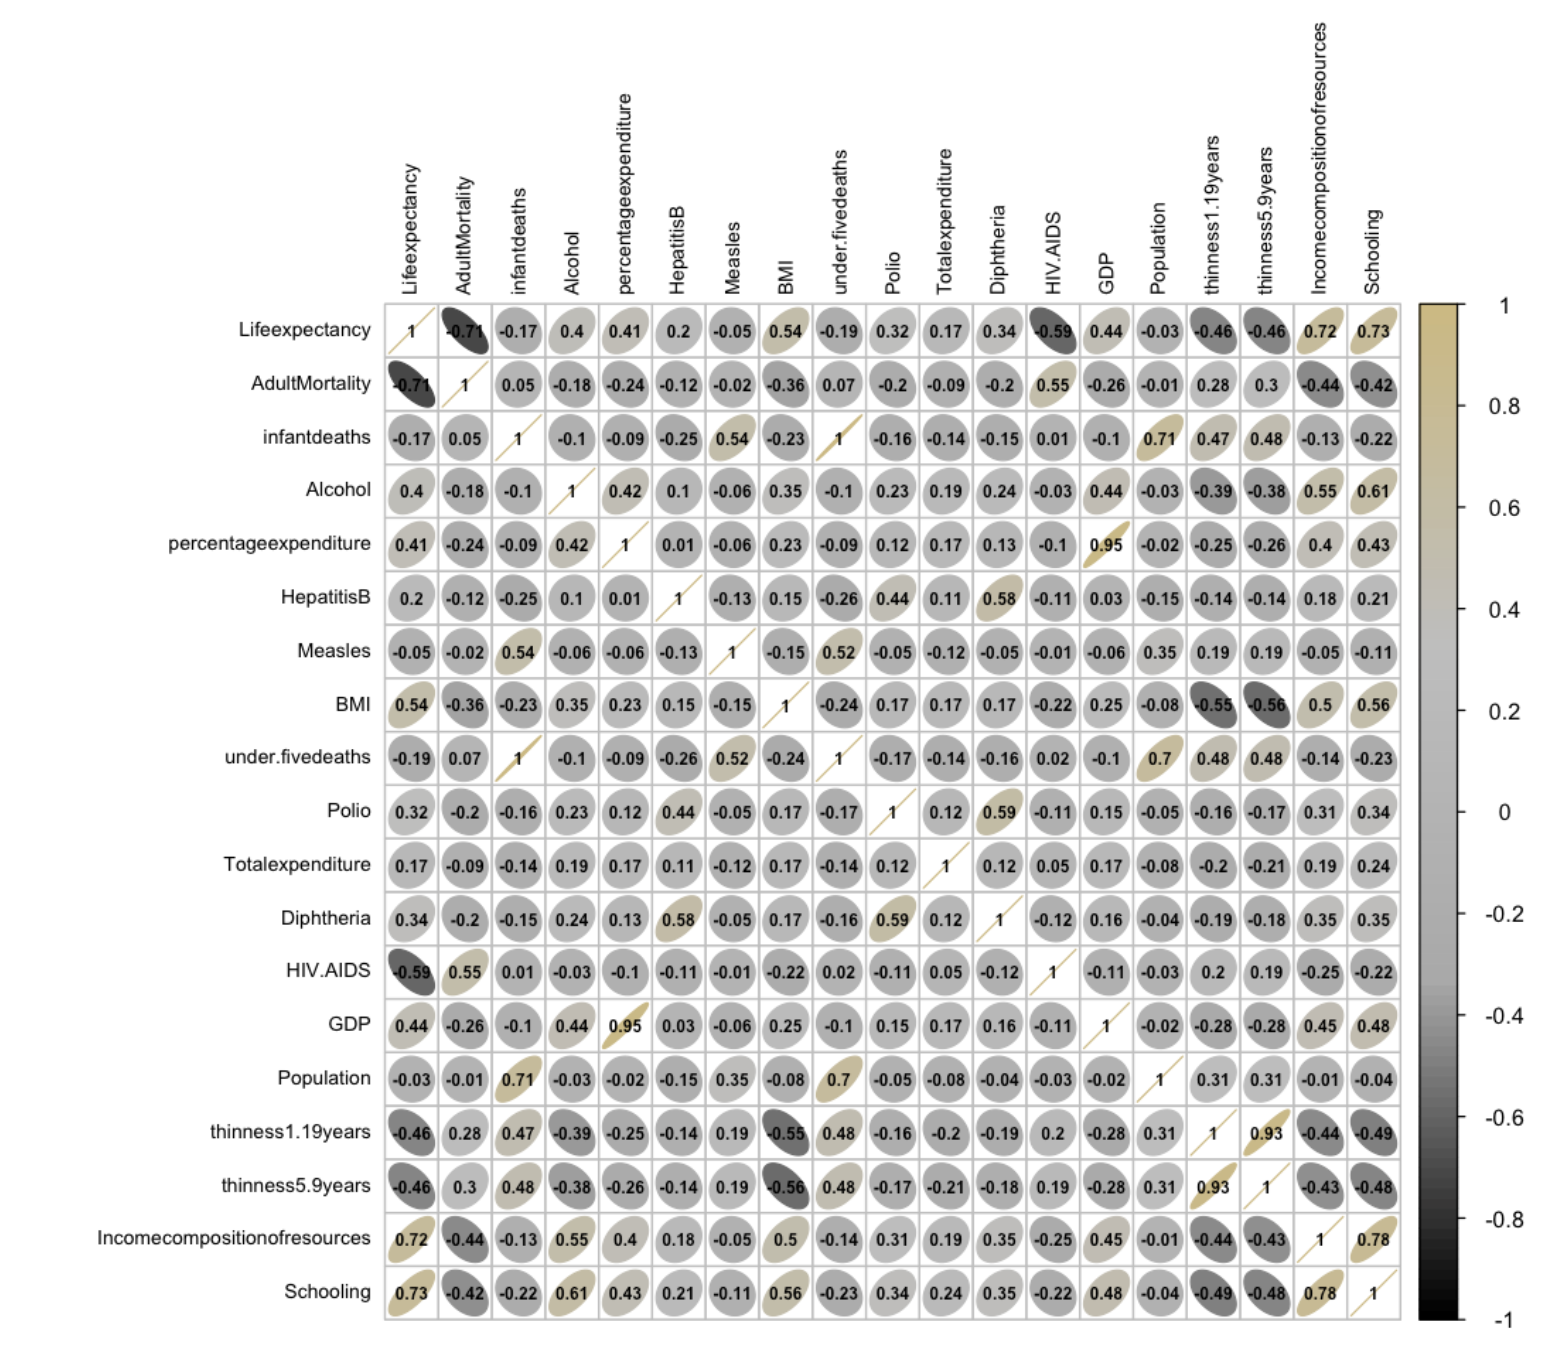

We can observe a strong positive correlation between schooling and income composition of resources with life expectancy. Conversely, there is a negative correlation between adult mortality and HIV/AIDS with life expectancy.  

**2.3 Statistical Analysis**  

**2.3.1 Bootstrapping and Confidence Interval**  

The purpose of this analysis is to assess whether the median life expectancy of the entire population, including both developing and developed countries, aligns with the confidence interval obtained from bootstrapping specifically for developing countries. This comparison helps us understand how well the overall median fits within the range of life expectancies observed in developing countries, thereby aiding our understanding of differences in health and well-being around the world.  

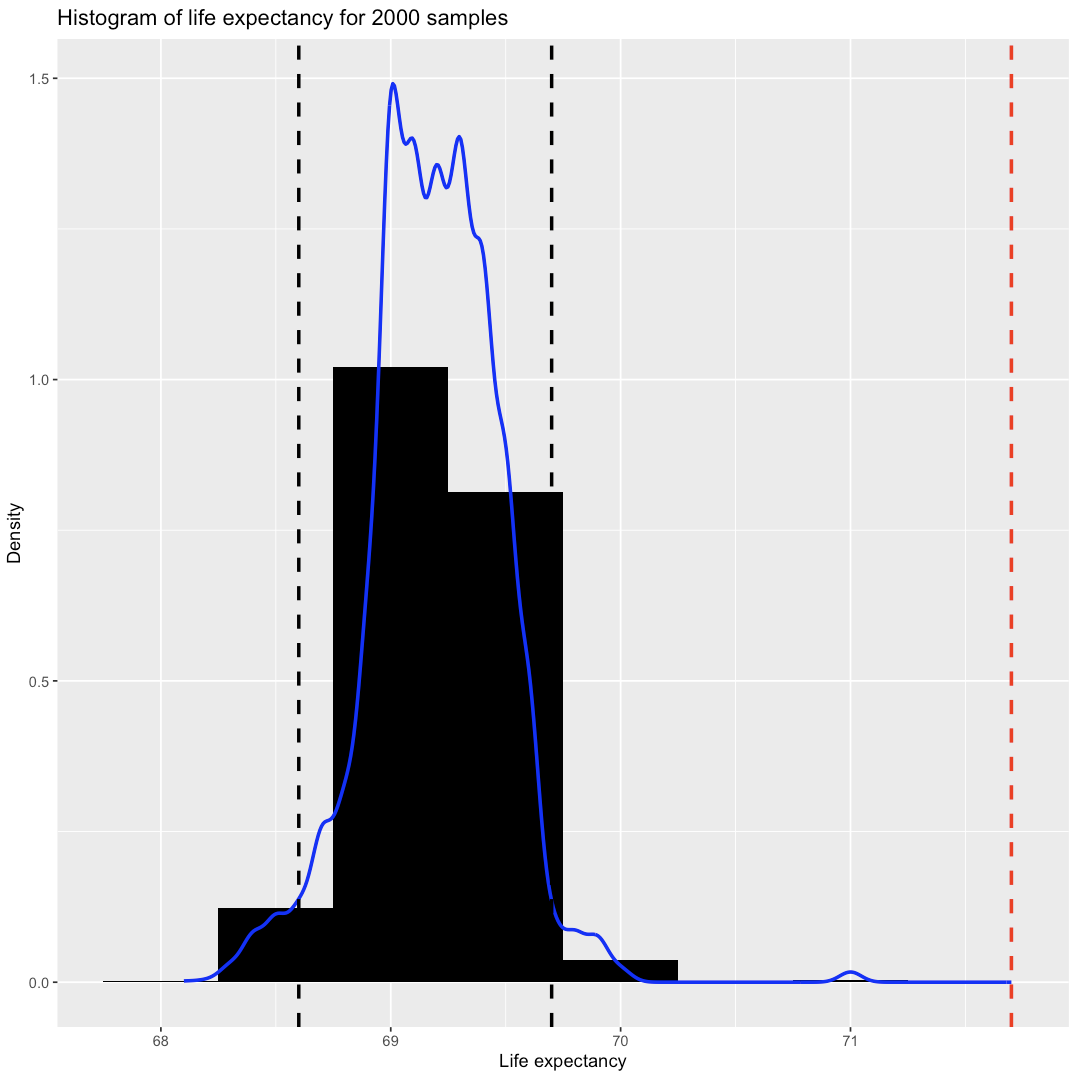

The median life expectancy of all countries falls outside the confidence interval of the bootstrapped developing countries. This highlights the differences in health outcomes between developed and developing areas, stressing the need for specific actions to tackle these gaps and ensure fairness in global healthcare access.  

**2.3.2 Hypothesis Testing**  

**Analysis 1:**
  
**Comparison of Life Expectancy: India vs. Other Countries**  

**Null hypothesis:** There is no difference in the mean life expectancy between India and other countries.  

**Alternate hypothesis:** The mean life expectancy in India is different from that of other countries.  

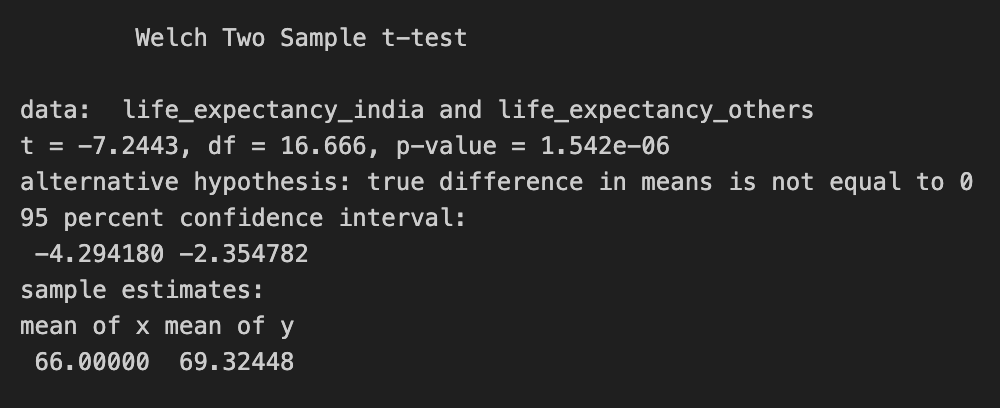

I observed that the p-value is less than 0.05 (i.e., a 95% confidence interval), indicating there is no significant difference in life expectancy between India and other countries. Therefore, we reject the null hypothesis.

**Analysis 2:**  

**Impact of BMI on Life expectancy**  

**Null hypothesis:** There is no association between BMI and Life expectancy.  

**Alternate hypothesis:** BMI affects life expectancy.   

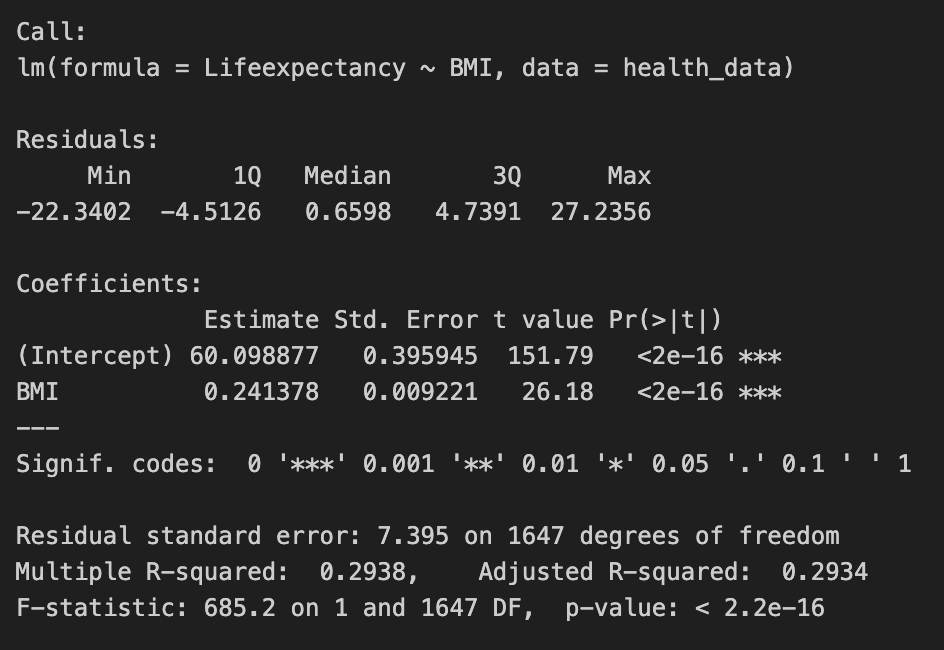

I observed that the p-value is less than 0.05 (i.e., a 95% confidence interval), indicating there is association between BMI and life expectancy. Therefore, we reject the null hypothesis.  

**2.3.3 MLR model and its Diagnostics**  

**2.3.3.1 Linearity**

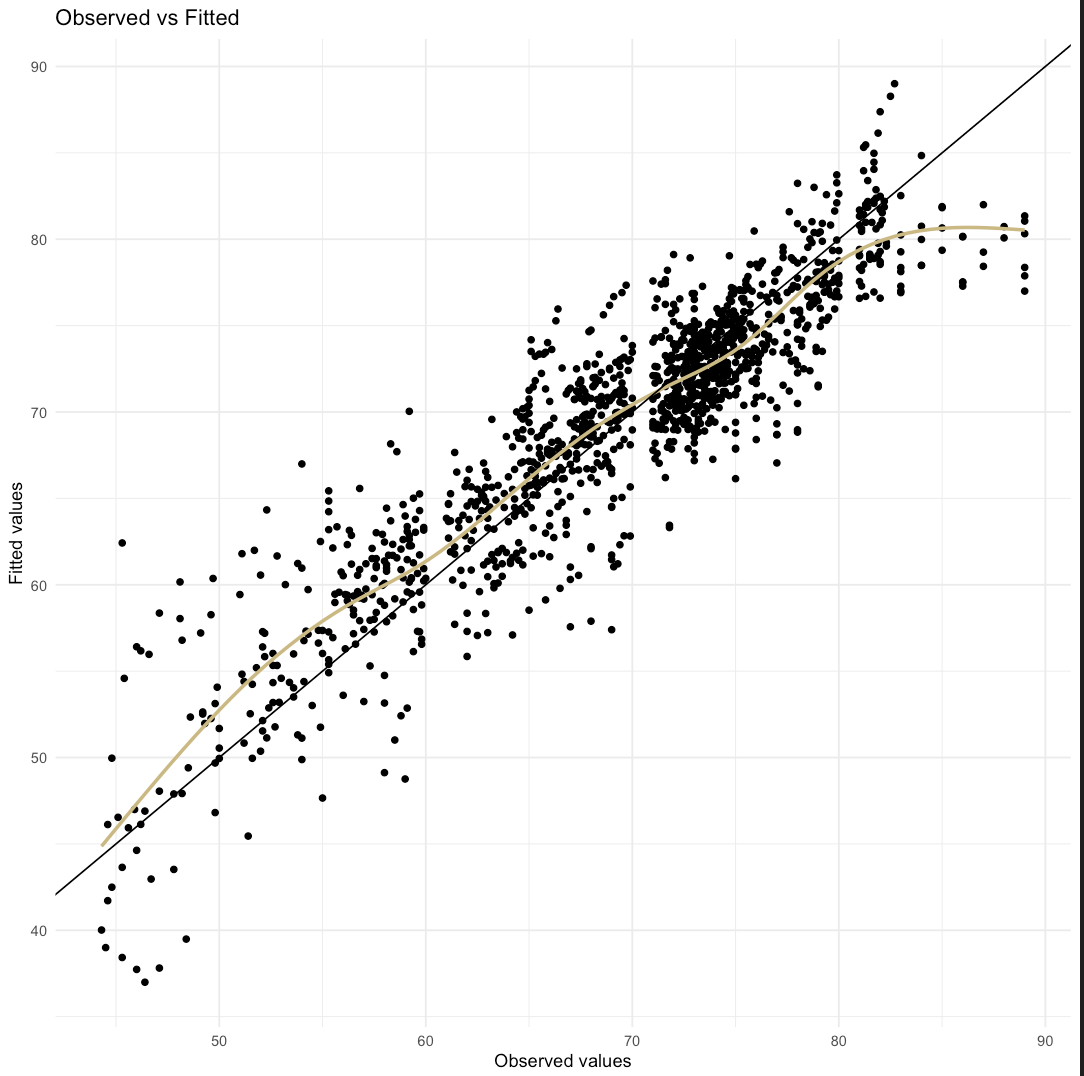

In the observed vs. fitted value plot, we observe that the smooth line depicted is nearly linear. This suggests that the linear model has adequately captured the dependent variable.  

**2.3.3.2 Normality**  

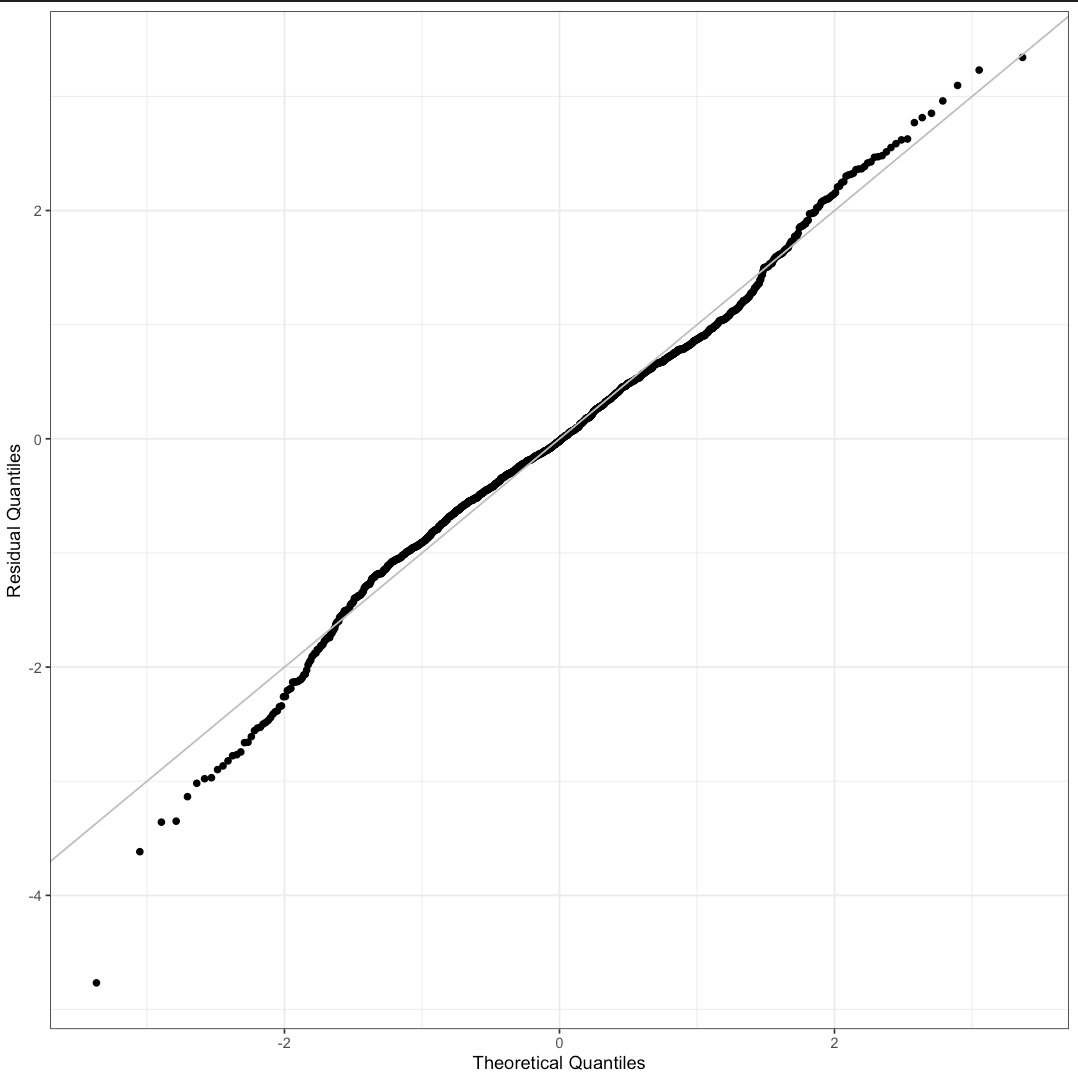

From the quantile-quantile plot, we observe that most of the data points fall along the straight line; however, there are some outliers at the tail end, indicating non-normality in the data.  

**2.3.3.3 Constant Variance**  

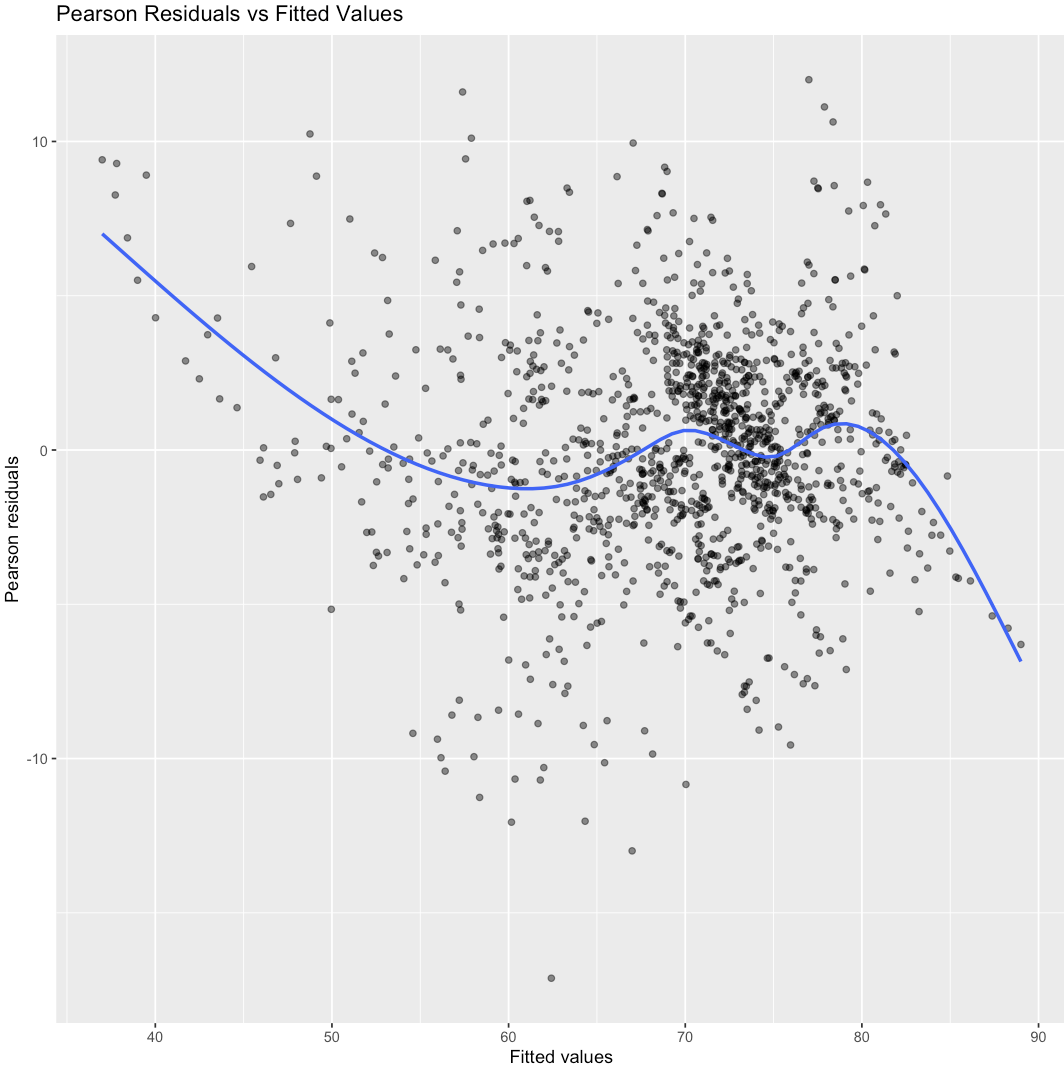

From the residual vs fitted values plot, we could interpret that the variance of the residuals is not constant. Here, the variance of the residual increases as fitted values increases.  

**Square root transformation to overcome constant variance problem**  

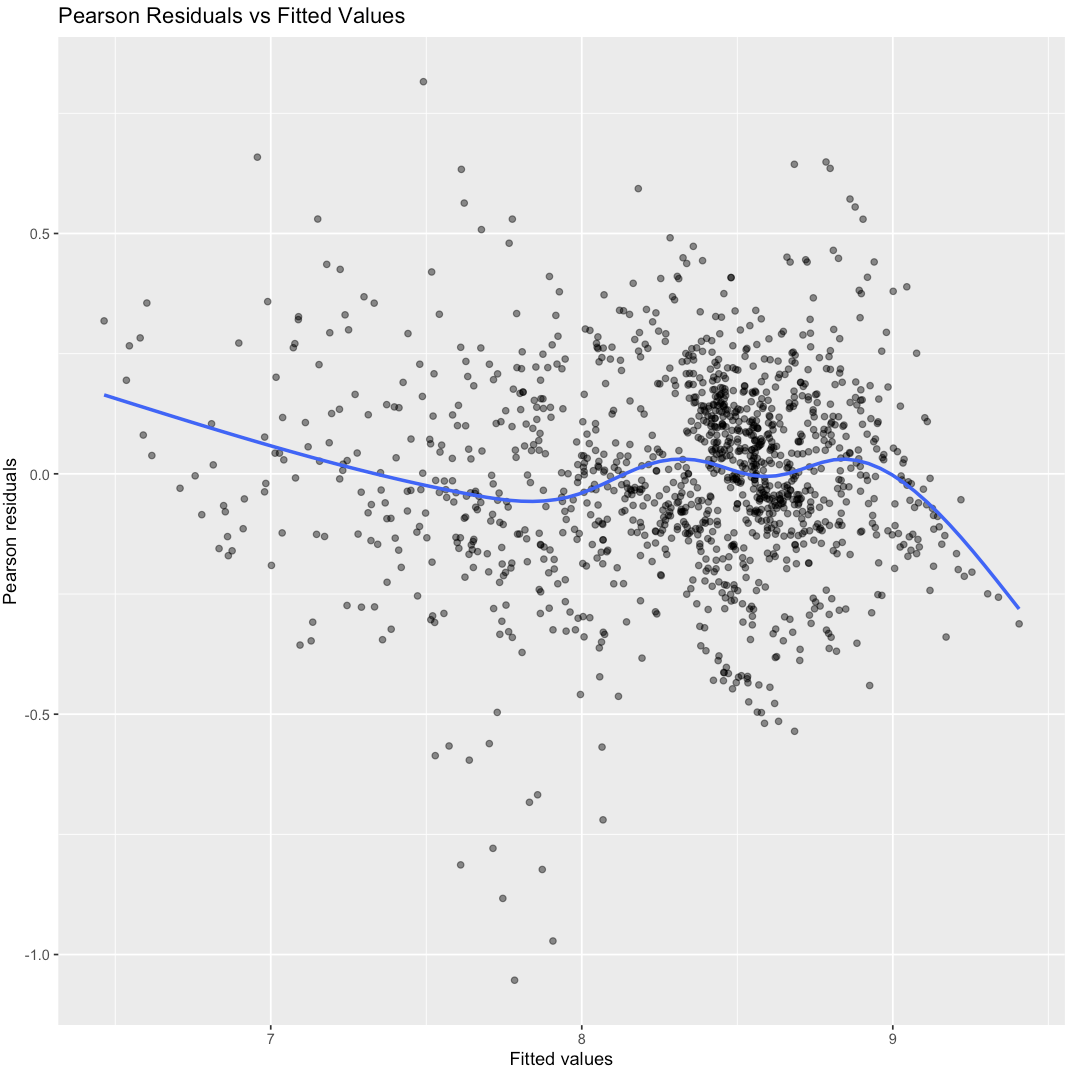

We can observe a certain level of constant variance compared to the variance before the transformation.  

**2.3.3.4 Autocorrelation**  

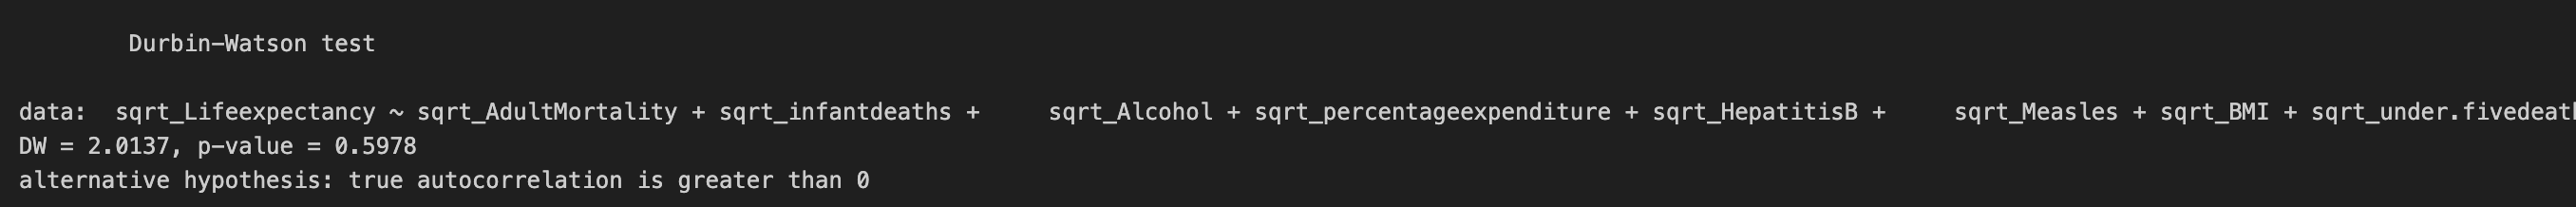

From the Durbin-Watson test, we can observe that the p-value is greater than 0.05 (i.e., at the 95% level of significance), suggesting that there is no autocorrelation.  

**2.3.3.5 Multicollinearity:**  

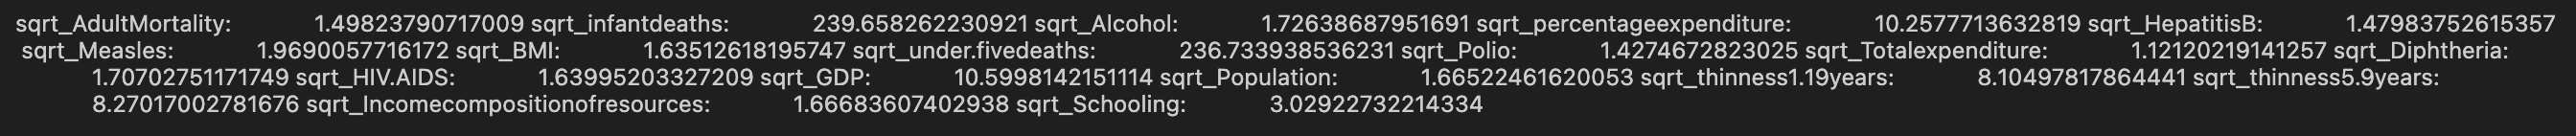

From the VIF results, we can see that some the scores fall above 5, suggesting that there is multicollinearity.  

**2.3.3.6 Feature selection using forward selection**  

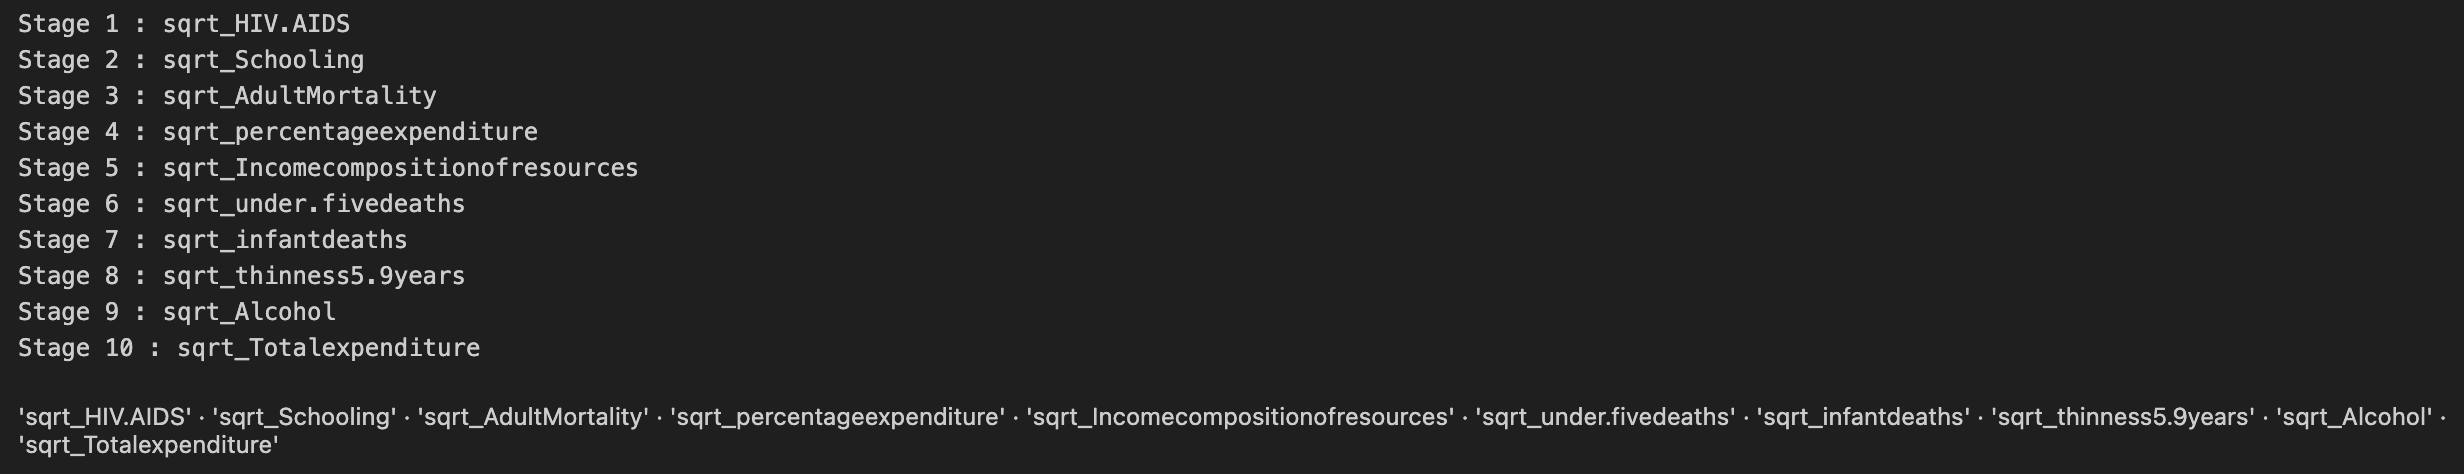

These are the top 10 features identified through forward model selection. Now, let's further explore them using backward model selection, AIC, BIC, and MSPE.

**2.3.4 T-test**  

**Null hypothesis:** There is no significant difference in the mean life expectancy between countries classified as "Developing" and "Developed.  

**$$H_0: \mu_{\text{Developing}} = \mu_{\text{Developed}}$$**

**Alternate hypothesis:** There is a significant difference in the mean life expectancy between countries classified as "Developing" and "Developed.  

 **$$H_a: \mu_{\text{Developing}} \neq \mu_{\text{Developed}}$$**

 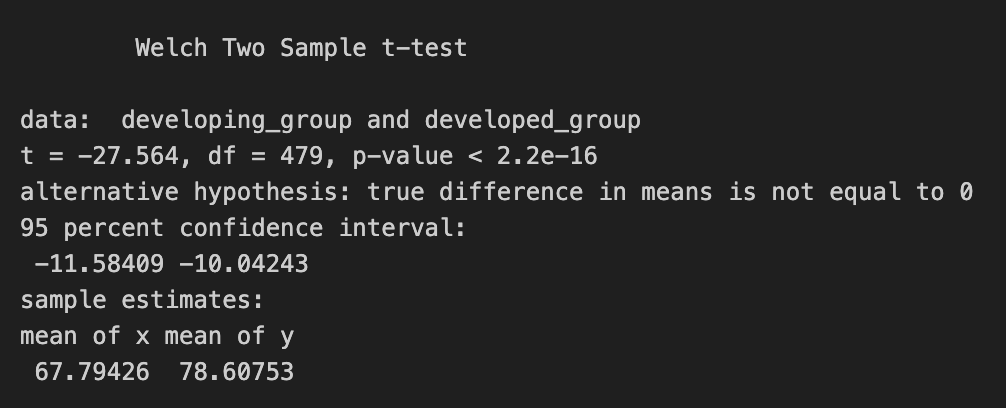

 We observe that the p-value is less than the 95% level of significance. This indicates a significant difference in the mean life expectancy between developed and developing countries. Therefore, we reject the null hypothesis.  

 **2.3.5 Model Selection**  

 **2.3.5.1 MSPE**

To identify the features crucial for predicting life expectancy, I conducted analyses based on mean squared prediction error. In this process, I systematically dropped features with p-values exceeding $\alpha_0 = 0.15$, using this threshold as a criterion for significance. I explored various scenarios to ensure robustness in my findings.  

* Considering all features  
* Dropping sqrt_Polio feature from the orginal dataset  
* Dropping sqrt_Population and sqrt_Polio feature from the orginal dataset   
* Dropping sqrt_thinness1.19years, sqrt_Population and sqrt_Polio feature from the orginal dataset  
* Dropping sqrt_Measles, sqrt_thinness1.19years, sqrt_Population and sqrt_Polio feature from the orginal dataset  
* Dropping sqrt_HepatitisB, sqrt_Measles, sqrt_thinness1.19years, sqrt_Population and sqrt_Polio feature from the orginal dataset 

**MPSE Scores**  

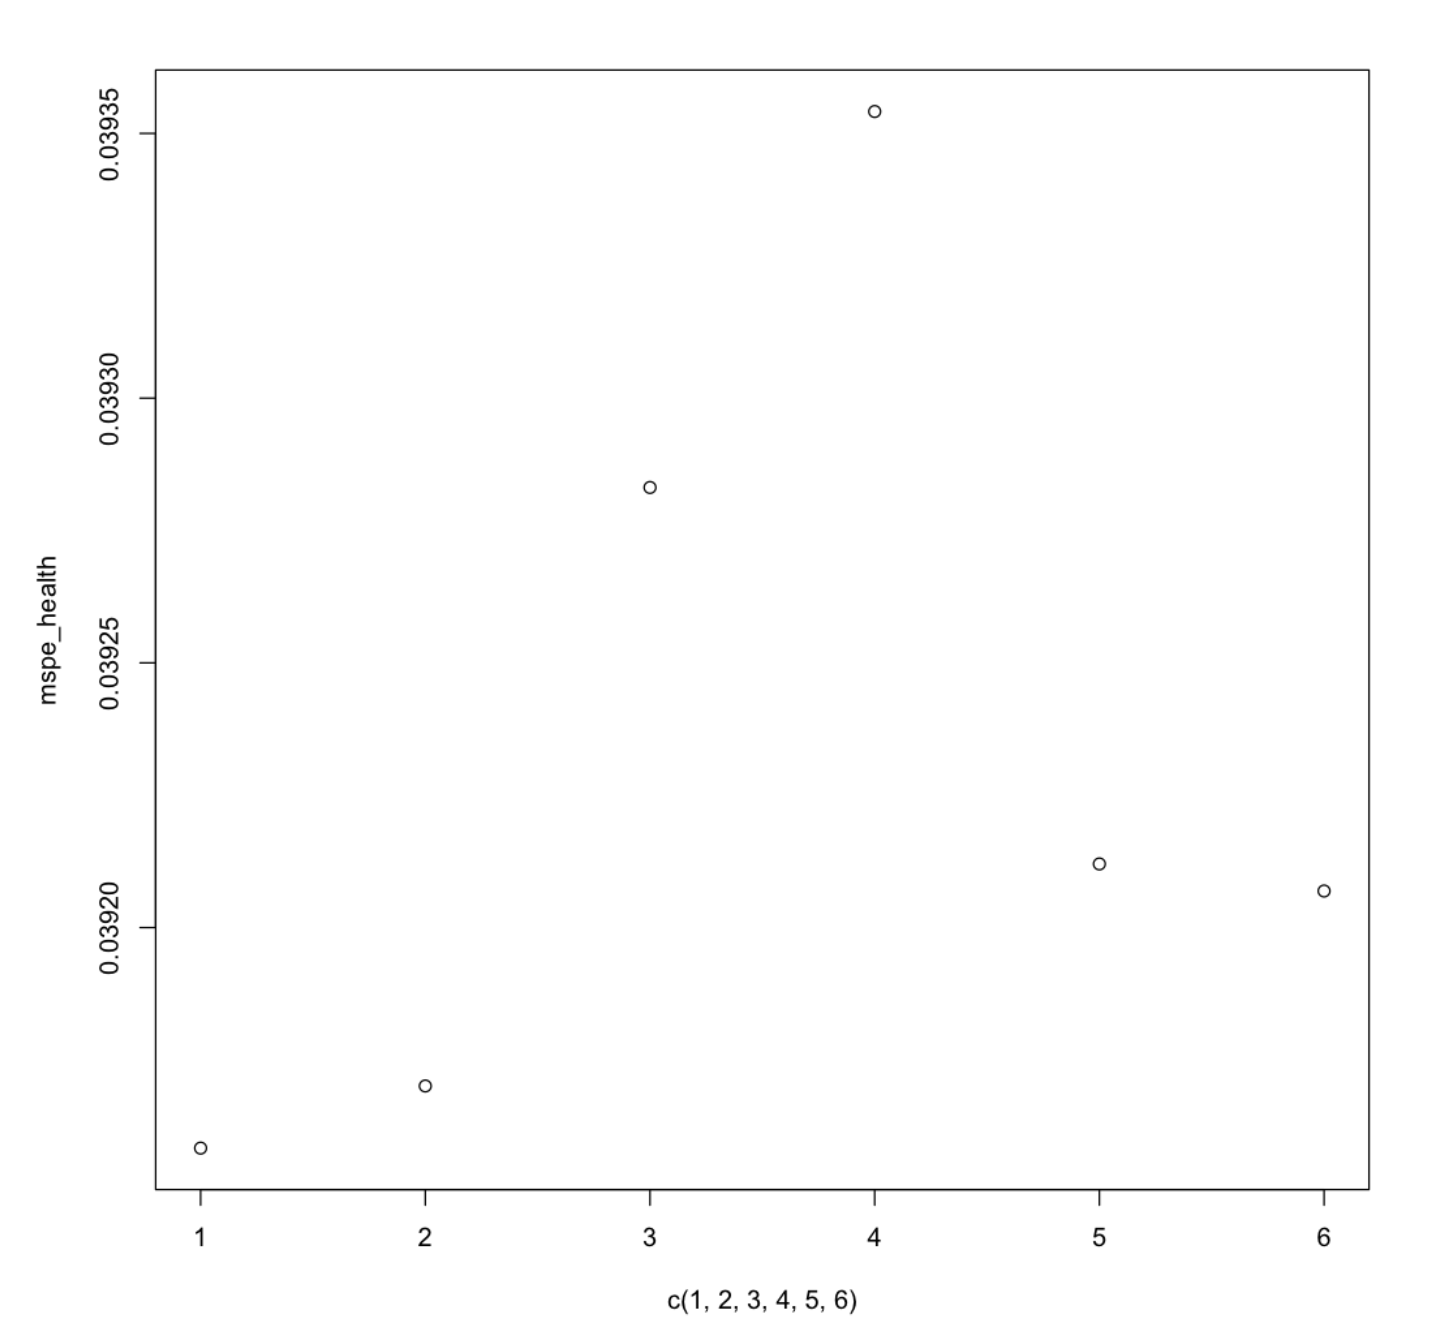 

We observe that the best model considers all features, as the mean squared prediction error is very low. However, we could also consider a model without the features Polio, Population, thinness1.19years, and Measles, as they resulted in a mean squared prediction error that is closer to the model considering all features, though slightly higher.

**2.3.5.2 AIC**  

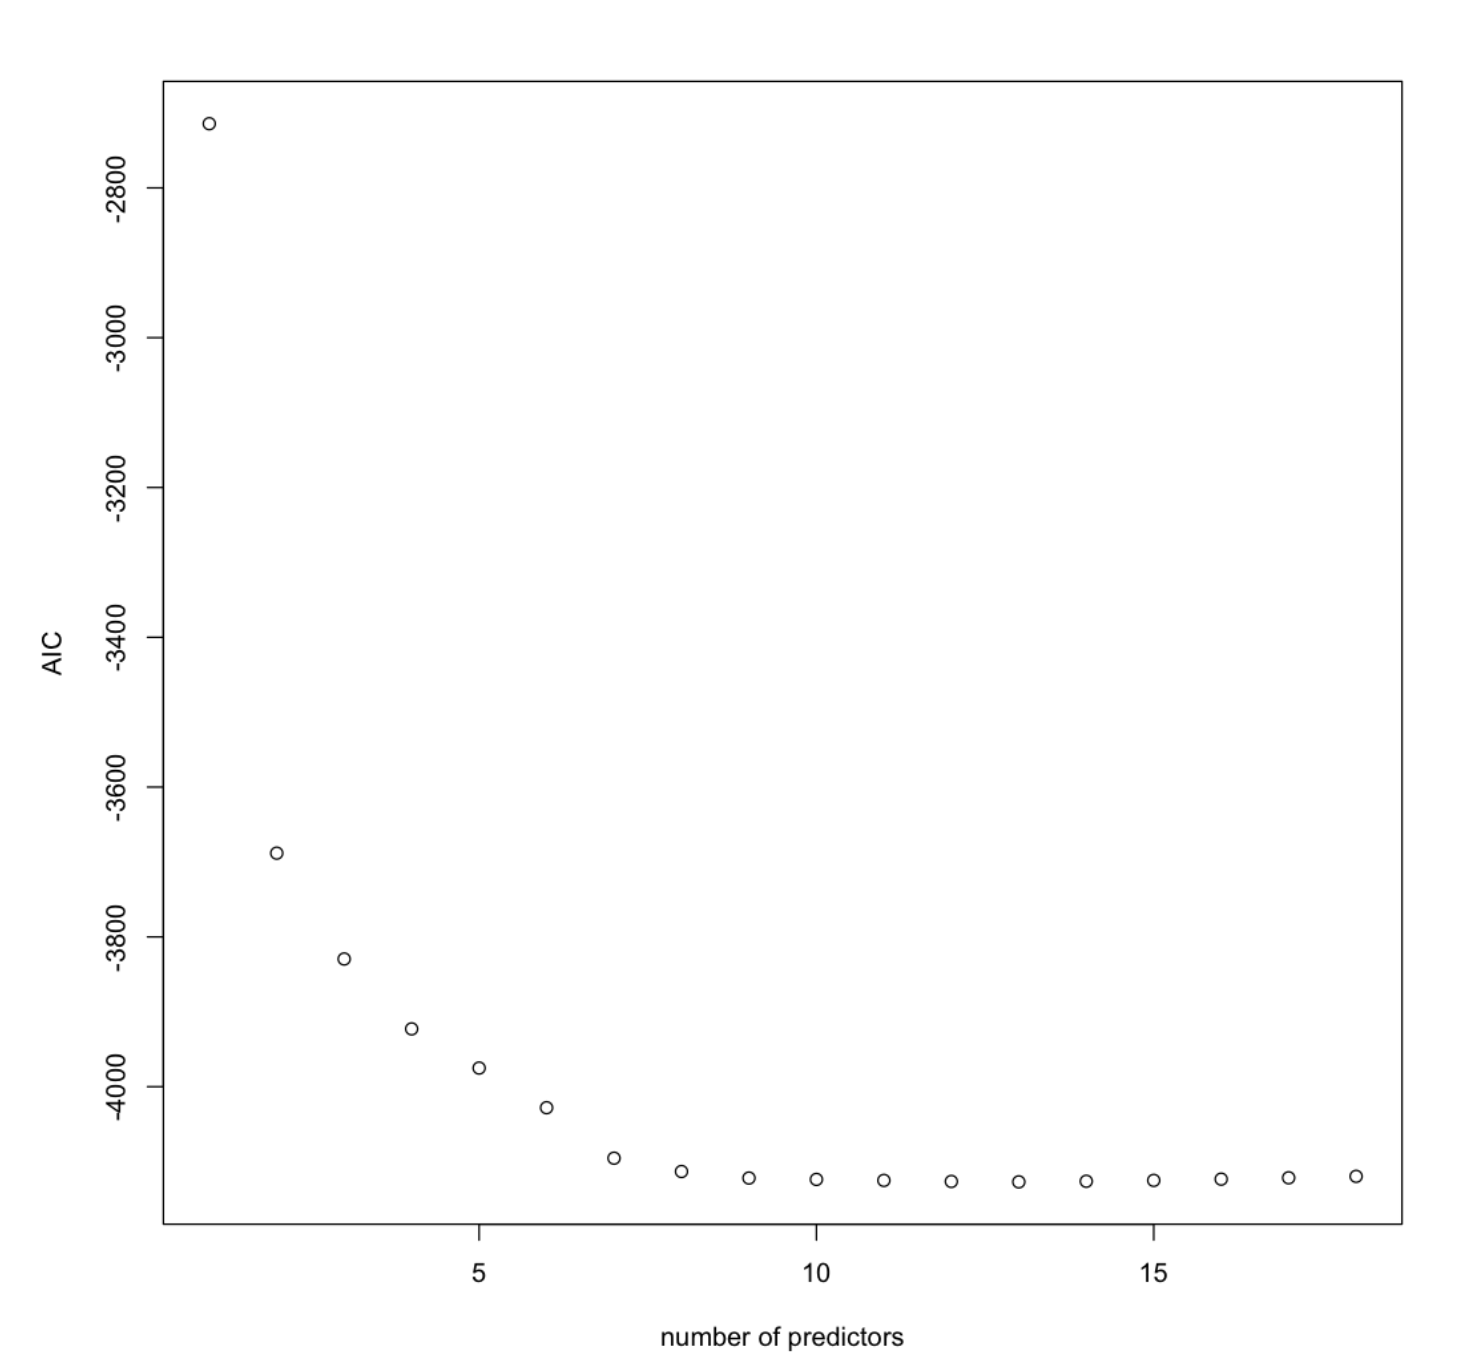

In this plot, we observe that the model of size k = 13 has the lowest AIC.

**2.3.5.3 Adjusted R-squared**

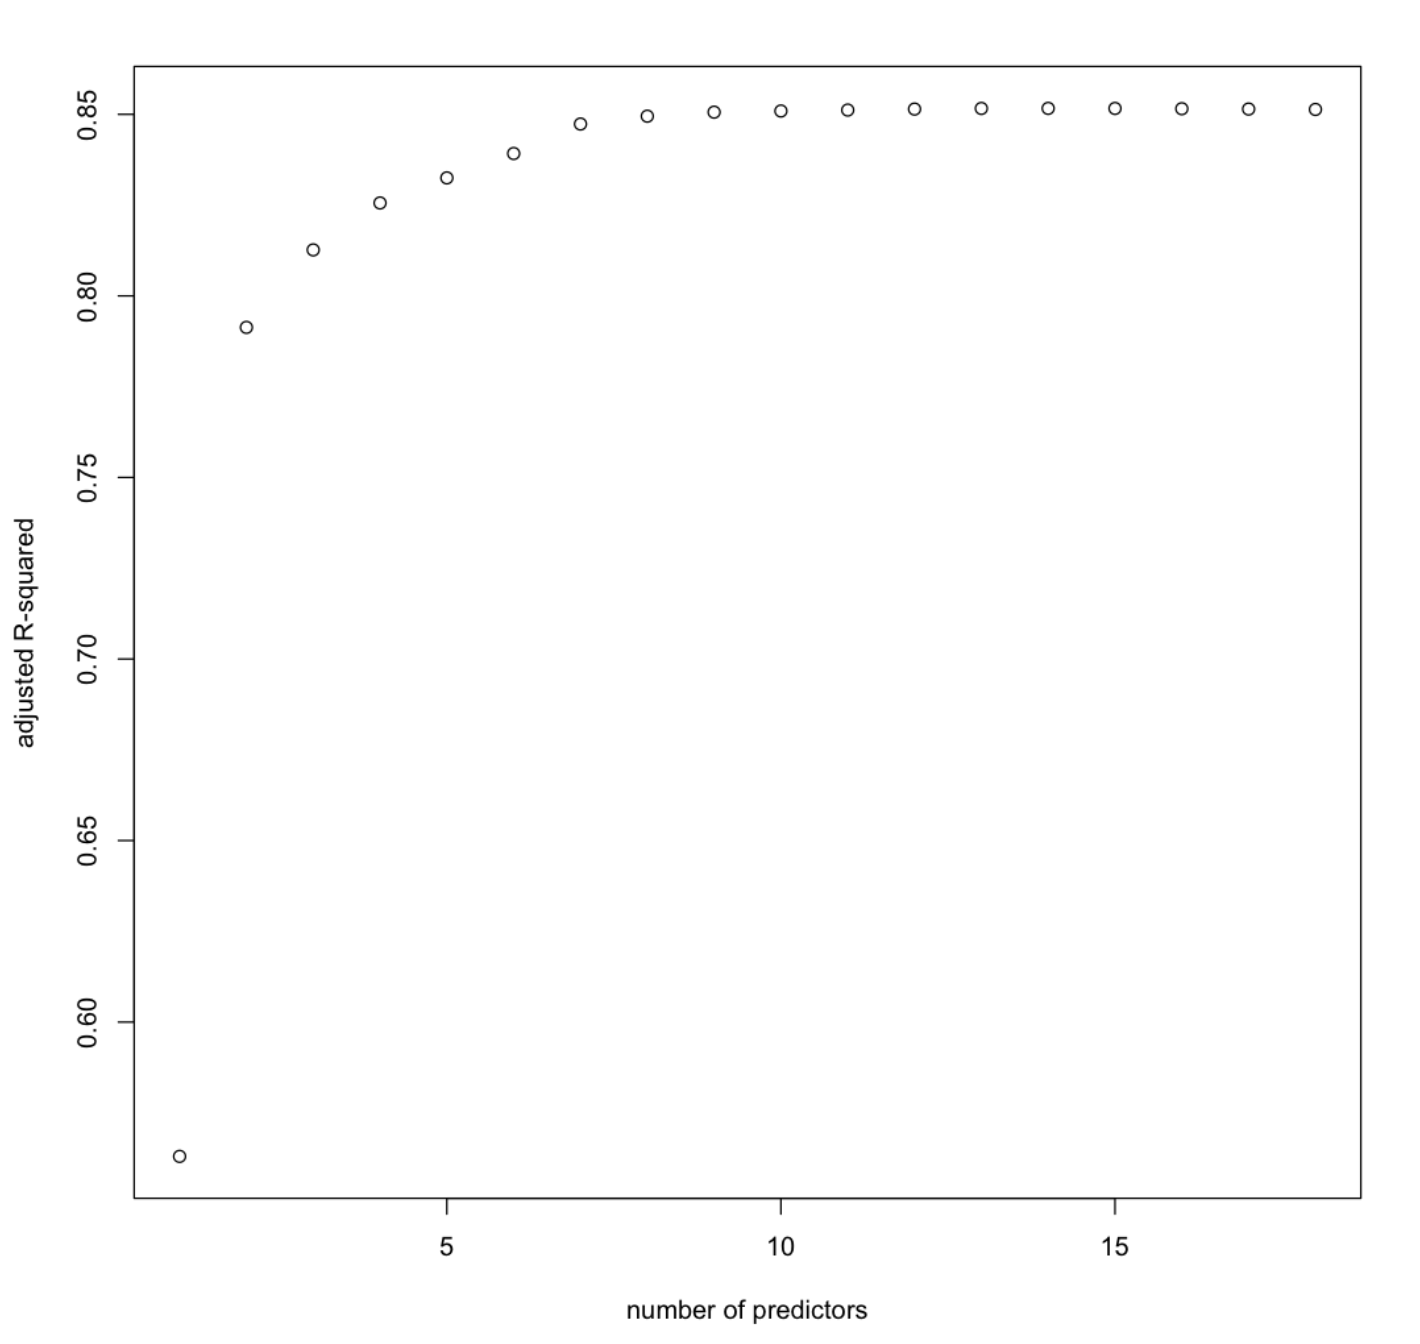

The adjusted R^2 suggests that the optimal number of predictors is 14.  

**2.3.5.4 BIC**  

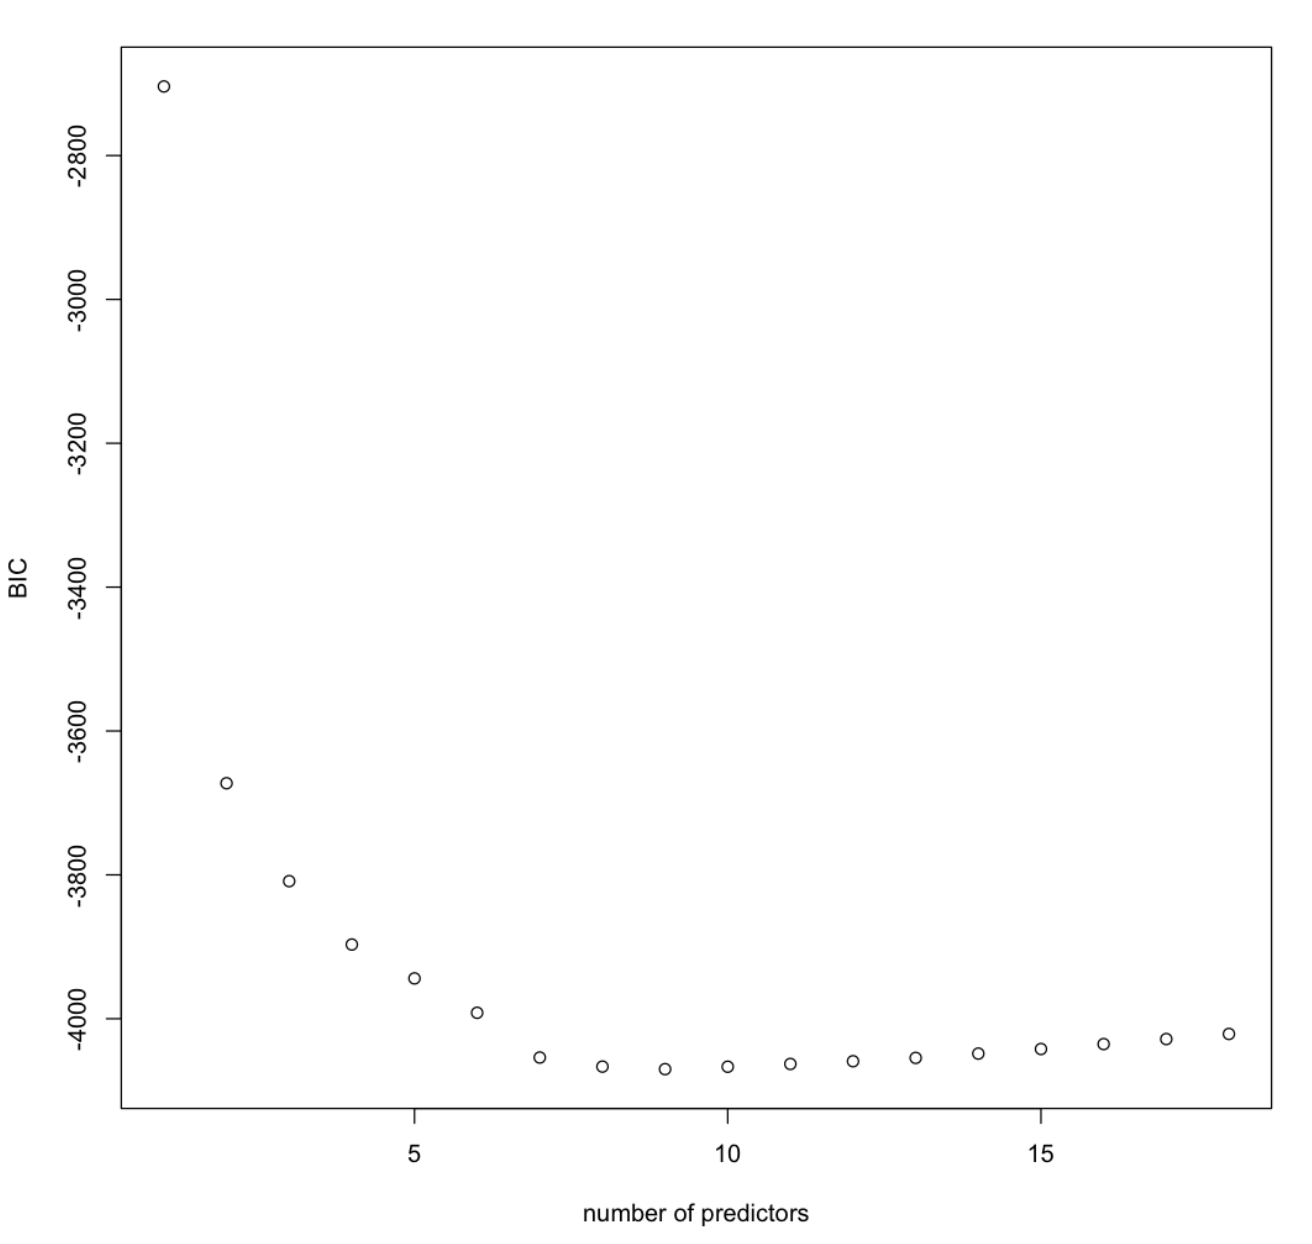

The BIC value suggests that the optimal number of predictors is 9.  

All the criteria shows a different model with,  

AIC - 13 predictors  
BIC - 9 predictors  
Adj r^2 - 14 predictors  

**2.3.6 F-test**  

Lets check if the reduced model is better compared to the full model with number of predictors that were suggested by the model techniques.

I have considered 13 predictors based on the results from the AIC and backward selection model, which yielded a lower mean squared prediction error.  

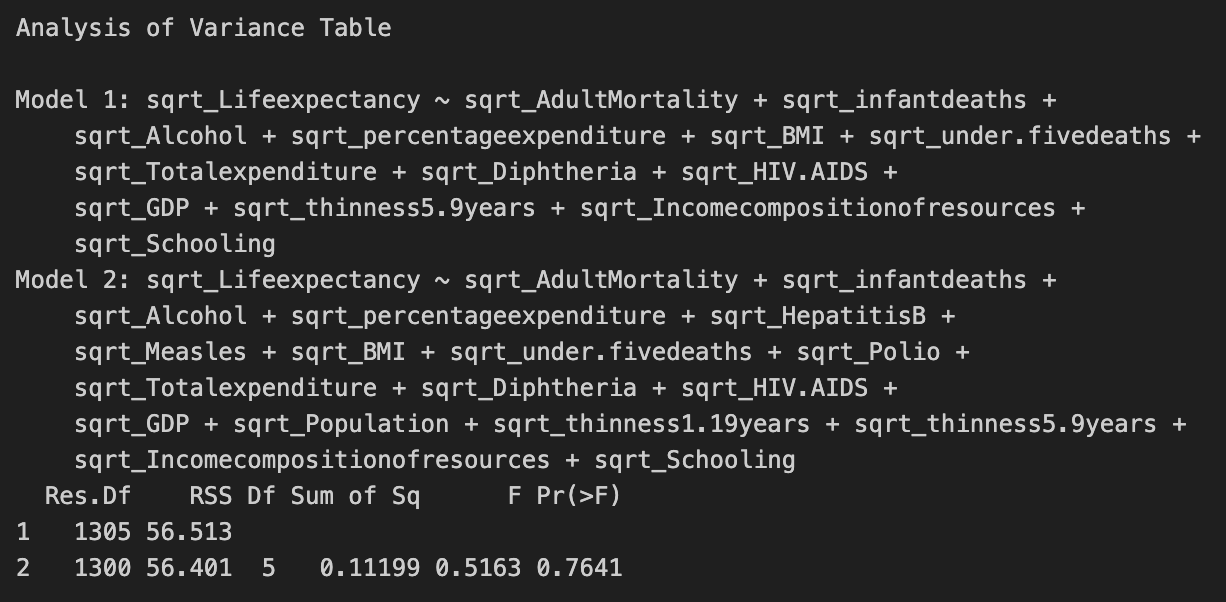

I observed a p-value greater than the 95% level of significance. Therefore, we conclude that the reduced model is not as effective as the full model.  

**3. Conclusion**  
From our analysis, we observed that all the features play an important role in determining life expectancy. The model achieved a relatively high accuracy, with an R-squared value of 85.34% and an adjusted R-squared value of 85.13%. Despite these promising results, it's important to note some violations of linear regression assumptions. Specifically, there were instances of non-normality due to outliers, multicollinearity issues with some features exhibiting high VIF values, and heteroscedasticity in terms of variance.

Nevertheless, the model provided valuable insights, highlighting features such as schooling, BMI, and health expenditure percentage as highly correlated with life expectancy. This suggests that investments in education, healthcare infrastructure, and public health initiatives could positively impact life expectancy. Additionally, further refinement of the model to address the identified assumptions violations could enhance its predictive accuracy and reliability.

To expand this research further, we could gather data for individual states within each country and conduct a more detailed analysis of life expectancy disparities. By focusing on regions with lower life expectancy, we could implement targeted interventions such as educational campaigns to improve health knowledge. Governments could take proactive measures in these areas by promoting healthier lifestyles, dietary habits, and other initiatives aimed at enhancing overall well-being.


